In [3]:
!nrnivmodl /home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod
from neuron import h
import plotly.graph_objects as go
import matplotlib.colors as mcolors
from neuron.units import ms, mV
import plotly.io as pio
from matplotlib import pyplot, cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
from neuron import clear_gui_callback
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from numpy.linalg import pinv, eig
import numpy as np
from multiprocessing import Pool
font2={'family':'Times New Roman',
'weight':'bold',
'size': 10}
# 自定义刻度标签显示格式


h.load_file('nrngui.hoc')
h.load_file("import3d.hoc")

morphologyFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/morphologies/cell1.asc"
biophysicalModelFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/models/L5PCbiophys1.hoc"
biophysicalModelTemplateFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/models/L5PCtemplate.hoc"

h.load_file(biophysicalModelFilename)
h.load_file(biophysicalModelTemplateFilename)
import sys
sys.path.append('/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron')
from common_function import exp_fitting, plot_curve

/home/wzl/anaconda/envs/neuron9/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
INFO : Using neuron-nightly Package (Developer Version)
/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron
cfiles =
Mod files: "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/CaDynamics_E2.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ca_HVA.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ca_LVAst.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/epsp.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ih.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Im.mod" "/home/wzl/LFPy/project/conductance_measurement/real

--No graphics will be displayed.


In [4]:
from matplotlib.ticker import FuncFormatter
def format_func(value, tick_number):
    return f'{value:.0f}'  # 将刻度值格式化为小数点后两位
def plot_curve(ax2,x,y,color='black',title='', linestyle='-',linewidth=2, xlim=[0,100],dx=20,
               ylim=[0,10],dy=5.0, fontsize=10, alpha = 1.0, xlabel='Time/ms', 
               ylabel = 'Frequency/Hz', label='',ynum_decimals =1, facecolors='none',
               nonscatter=True, s0=10, facecolor='none'):
    if nonscatter:
        if color:
            ax2.plot(x,y,color=color,linewidth=linewidth,linestyle=linestyle,alpha=alpha, label=label)
        else:
            ax2.plot(x,y,linewidth=linewidth,alpha=alpha, linestyle=linestyle,label=label)
    else:
        if color:
            ax2.scatter(x,y,edgecolors=color,facecolors = facecolor, alpha=alpha, 
                        label=label, s=s0)
        else:
            ax2.scatter(x,y, alpha=alpha, label=label,
                        s=s0)
        
    ax2.set_xlabel(xlabel,font2)
    ax2.set_ylabel(ylabel,font2)
    
    # def format_funcx(value, tick_number, num_decimals=xnum_decimals):
    #     if num_decimals==0:
    #         return f'{value:.0f}'
    #     return f'{value:.{num_decimals}f}'

    def format_funcy(value, tick_number, num_decimals=ynum_decimals):
        if num_decimals==0:
          return f'{value:.0f}'
        return f'{value:.{num_decimals}f}'

    # if dx:
    #     ax2.set_xticks(np.arange(xlim[0], xlim[1] + dx, dx))
    #     ax2.set_xticklabels(ax2.get_xticks(), fontsize=fontsize, weight='bold')
    #     ax2.set_xlim([xlim[0], xlim[1]])
        # ax2.xaxis.set_major_formatter(FuncFormatter(format_funcx))

    if dy:
        ax2.set_yticks(np.arange(ylim[0], ylim[1] + dy, dy))
        ax2.set_yticklabels(ax2.get_yticks(), fontsize=fontsize, weight='bold')
        ax2.set_ylim([ylim[0], ylim[1]])
        ax2.yaxis.set_major_formatter(FuncFormatter(format_funcy))
        
  
    if xlim:
       ax2.set_xticks(np.arange(xlim[0],xlim[1]+dx,dx))
       ax2.set_xticklabels(np.arange(xlim[0],xlim[1]+dx,dx),fontsize=10,weight='bold')
       ax2.set_xlim(xlim)
    # if ylim:
    #    ax2.set_yticks(np.arange(ylim[0],ylim[1]+dy,dy))
    #    ax2.set_yticklabels(np.arange(ylim[0],ylim[1]+dy,dy),fontsize=10,weight='bold')
    #    ax2.set_ylim(ylim)
    if title:
       ax2.set_title('{0}'.format(title),fontsize=12,weight='bold')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    if label:
       ax2.legend(loc='best',prop=font2,edgecolor='white')

In [3]:

L5PC = h.L5PCtemplate(morphologyFilename)
ps = h.PlotShape(False)
ps.variable("v")
fig=ps.plot(plotly, cmap=cm.cool)
fig.show()

# V_rest

-88.86418852862772


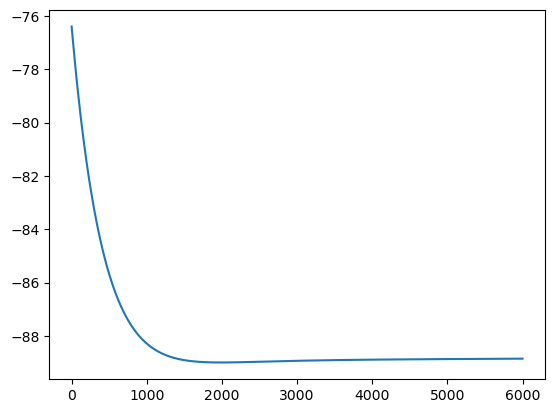

In [5]:
run_dt = 0.1
L5PC = h.L5PCtemplate(morphologyFilename)
for sec in h.allsec():
    if h.ismembrane("Ih",sec=sec):
        sec.gIhbar_Ih = 0.0002/20.


h.dt = run_dt
h.tstop = 600.
h.v_init = -76.4
recv = h.Vector().record(L5PC.soma[0](0.5)._ref_v)

# Function to initialize the simulation
def initialize():
    h.t = 0
    h.finitialize(h.v_init)
    h.fcurrent()

# Function to integrate the simulation
def integrate():
    while h.t < h.tstop:
        h.fadvance()

# Function to run the simulation
def go():
    initialize()
    integrate()


go()
recv0 =  np.array(recv.to_python())
plt.plot(recv0)
print(recv0[5000])

# effective conductance

In [ ]:
def eff_cond_est_two_normIh(run_dt, fE, fI, C=0.00024, GL = 1.93e-05, passive=True, locE=58, locI=37,
                         plot =False,  block='',name= '', locationE ='dend',locationI ='dend'):
    
    L5PC = h.L5PCtemplate(morphologyFilename)
    
    if passive:
        for sec in h.allsec():
            # 检查 section 是否有主动离子通道
            if h.ismembrane("na3", sec=sec):
                # 将电导设置为0
                sec.gbar_na3 = 0.
            if h.ismembrane("h", sec=sec):
                sec.ghdbar_h = 0.
            if h.ismembrane("kadist", sec=sec):
                sec.gkabar_kadist = 0.
            if h.ismembrane("kaprox", sec=sec):
                sec.gkabar_kaprox = 0.
            if h.ismembrane("kdrca1", sec=sec):
                sec.gkdrbar_kdrca1 = 0.
            if h.ismembrane("nax", sec=sec):
                sec.gbar_nax = 0.
            if h.ismembrane("Ca_HVA",sec=sec):
                sec.gCa_HVAbar_Ca_HVA = 0.
            if h.ismembrane("Ca_LVAst",sec=sec):
                sec.gCa_LVAstbar_Ca_LVAst = 0.
            if h.ismembrane("Ih",sec=sec):
                sec.gIhbar_Ih = 0.
            if h.ismembrane("Im",sec=sec):
                sec.gImbar_Im = 0.
            if h.ismembrane("K_Pst",sec=sec):
                sec.gK_Pstbar_K_Pst = 0.
            if h.ismembrane("K_Tst",sec=sec):
                sec.gK_Tstbar_K_Tst = 0.
            if h.ismembrane("Nap_Et2",sec=sec):
                sec.gNap_Et2bar_Nap_Et2 = 0.
            if h.ismembrane("NaTa_t",sec=sec):
                sec.gNaTa_tbar_NaTa_t = 0.
            if h.ismembrane("NaTs2_t",sec=sec):
                sec.gNaTs2_tbar_NaTs2_t = 0.
            if h.ismembrane("SK_E2",sec=sec):
                sec.gSK_E2bar_SK_E2 = 0.
            if h.ismembrane("SKv3_1",sec=sec):
                sec.gSKv3_1bar_SKv3_1 = 0.   
    
    if block:
        for sec in h.allsec():
            if h.ismembrane(block, sec=sec):
                # 将电导设置为0
                setattr(sec, name, 0.)
    
            # for sec in h.allsec():
            # if h.ismembrane("Ih",sec=sec):
            #     sec.gIhbar_Ih = gIhbar_Ih  
    
    for sec in h.allsec():
        if h.ismembrane("Ih",sec=sec):
            sec.gIhbar_Ih = 0.0002/20.

    h.dt = run_dt
    h.tstop = 600.
    if passive:
        h.v_init = -90.
        Vclamp_init = -90.
    else:
        h.v_init = -88.86
        Vclamp_init = -88.86
    recv = h.Vector().record(L5PC.soma[0](0.5)._ref_v)
    
    # Initialize an excitatory and inhibitory synaptic input
    # make a new stimulator
    stimE = h.NetStim()
    stimI = h.NetStim()
    
    reversal_E = 1.14    
    reversal_I = -98.86

    if locationE == 'dend':
        synE = h.Exp2Syn(L5PC.dend[int(locE)](0.5))
    if locationE == 'apic':
        synE = h.Exp2Syn(L5PC.apic[int(locE)](0.5))
    if locationE == 'soma':
        synE = h.Exp2Syn(L5PC.soma[0](0.5))
    
    if locationI == 'dend':
        synI = h.Exp2Syn(L5PC.dend[int(locI)](0.5))
    if locationI == 'apic':
        synI = h.Exp2Syn(L5PC.apic[int(locI)](0.5))
    if locationI == 'soma':
        synI = h.Exp2Syn(L5PC.soma[0](0.5))
    synE.tau1 = 1.  # ms
    synE.tau2 = 5.  # ms
    synI.tau1 = 1.  # ms
    synI.tau2 = 5.  # ms

    synE.e = reversal_E  # mV for E input and -100 for I input 
    synI.e = reversal_I
        
    stimE.number = 1
    stimE.start = h.tstop - 100.  # ms
    stimI.number = 1
    stimI.start = h.tstop - 100.  # ms
    ncstimE = h.NetCon(stimE, synE)
    ncstimE.delay = 0.
    ncstimE.weight[0] = 0e-2  # uS
    ncstimI = h.NetCon(stimI, synI)
    ncstimI.delay = 0.
    ncstimI.weight[0] = 0e-2  # uS


    # Initialize voltage clamp
    vclamp = h.SEClamp(L5PC.soma[0](0.5))
    vclamp.amp1 = Vclamp_init
    vclamp.dur1 = h.tstop
    vclamp.dur2 = h.tstop
    vclamp.amp2 = Vclamp_init - 20.

    irec = h.Vector()
    irec.record(vclamp._ref_i)

    # Function to initialize the simulation
    def initialize():
        h.t = 0
        h.finitialize(h.v_init)
        h.fcurrent()

    # Function to integrate the simulation
    def integrate():
        while h.t < h.tstop:
            h.fadvance()

    # Function to run the simulation
    def go():
        initialize()
        integrate()

    # Main simulation loop
    def main():

        Vclamp = np.arange(-110.,-60.,10)
        tstart = int(stimI.start/run_dt+1)

        V_rest = -88.86
        epsilonE = reversal_E - V_rest
        epsilonI = reversal_I - V_rest
        epsilonI1 = reversal_I - 20. - V_rest
        
        
        #  pure E for the estimation of true GE_est
        vclamp.dur1 = 0.
        vclamp.dur2 = 0.
        vclamp.dur3 = 0.
        ncstimE.weight[0] = fE
        ncstimI.weight[0] = 0.
        go()
        recvE0 = np.array(recv.to_python())
        recvE0_norm = recvE0[tstart:tstart+1000] - V_rest
        dVdtE = np.diff(recvE0_norm)/run_dt
        dVdtE = np.append(dVdtE, 0)
        GE_est = (C*dVdtE + GL*recvE0_norm)/(epsilonE - recvE0_norm)
        
        #  pure I input for the estimation of GI_est
        vclamp.dur1 = 0.
        vclamp.dur2 = 0.
        vclamp.dur3 = 0.
        ncstimE.weight[0] = 0.
        ncstimI.weight[0] = fI
        go()
        recvI0 = np.array(recv.to_python())
        recvI0_norm = recvI0[tstart:tstart+1000] - V_rest
        dVdtI = np.diff(recvI0_norm)/run_dt
        dVdtI = np.append(dVdtI, 0)
        GI_est = (C*dVdtI + GL*recvI0_norm)/(epsilonI - recvI0_norm)
        if plot:
            plt.plot(recvE0_norm, 'r')
            plt.plot(recvI0_norm, 'b')
        
        
    
        Isyn_inj_t = np.zeros((len(Vclamp),1000))
        Isyn_epsilonI1_inj_t = np.zeros((len(Vclamp),1000))

        

        for i in range(len(Vclamp)):
            ncstimE.weight[0] = 0.
            ncstimI.weight[0] = 0.
            vclamp.amp1 = Vclamp[i]
            vclamp.dur1 = h.tstop
            h.v_init = V_rest
            go()
            Iinj0 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
            
            synE.e = reversal_E
            synI.e = reversal_I
            ncstimE.weight[0] = fE
            ncstimI.weight[0] = fI
            vclamp.amp1 = Vclamp[i]
            vclamp.dur1 = h.tstop
            h.v_init = V_rest
            go()
            Iinj1 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
            Isyn = (Iinj1[tstart:tstart+1000] - Iinj0[tstart:tstart+1000])
            Isyn_inj_t[i,:] = Isyn
            
            synE.e = reversal_E
            synI.e = reversal_I - 20.
            ncstimE.weight[0] = fE
            ncstimI.weight[0] = fI
            vclamp.amp1 = Vclamp[i]
            vclamp.dur1 = h.tstop
            h.v_init = V_rest
            go()
            Iinj1_epsilonI1 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
            Isyn_epsilonI1 =  (Iinj1_epsilonI1[tstart:tstart+1000] - Iinj0[tstart:tstart+1000])
            Isyn_epsilonI1_inj_t[i,:] = Isyn_epsilonI1
            
                                                         
        traditional_effective_conductance = np.zeros((2,1000))
        intercept_effective_conductance = np.zeros((2,1000))
        A = np.ones((len(Vclamp),2))
        A[:,0] = Vclamp - V_rest
        for i in range(1000):
            x, residuals, rank, singular_values = np.linalg.lstsq(A, Isyn_inj_t[:,i], 
                                                                  rcond=None)
            x_epsilonI1, residuals, rank, singular_values = np.linalg.lstsq(A, 
                                Isyn_epsilonI1_inj_t[:,i], rcond=None)
            
            traditional_effective_conductance[1, i] = (x[0]*epsilonE + x[1])/(epsilonE - epsilonI)
            traditional_effective_conductance[0, i] = (x[0]*epsilonI + x[1])/(epsilonI - epsilonE)
           
            intercept_effective_conductance[1,i] = (x[1] - x_epsilonI1[1])/(epsilonI1 - epsilonI)
            intercept_effective_conductance[0,i] = (-intercept_effective_conductance[1,i]*epsilonI - x[1])/epsilonE
            
        
        return intercept_effective_conductance, traditional_effective_conductance, GE_est, GI_est
    
    
    intercept_effective_conductance, traditional_effective_conductance,GE_est, GI_est = main()
    return intercept_effective_conductance, traditional_effective_conductance,GE_est, GI_est

In [57]:
def eff_cond_est_two(run_dt, fE, fI, C=0.00024, GL = 1.93e-05, passive=True, locE=58, locI=37,
                         plot =False,  block='',name= '', locationE ='dend',locationI ='dend'):
    
    L5PC = h.L5PCtemplate(morphologyFilename)
    
    if passive:
        for sec in h.allsec():
            # 检查 section 是否有主动离子通道
            if h.ismembrane("na3", sec=sec):
                # 将电导设置为0
                sec.gbar_na3 = 0.
            if h.ismembrane("h", sec=sec):
                sec.ghdbar_h = 0.
            if h.ismembrane("kadist", sec=sec):
                sec.gkabar_kadist = 0.
            if h.ismembrane("kaprox", sec=sec):
                sec.gkabar_kaprox = 0.
            if h.ismembrane("kdrca1", sec=sec):
                sec.gkdrbar_kdrca1 = 0.
            if h.ismembrane("nax", sec=sec):
                sec.gbar_nax = 0.
            if h.ismembrane("Ca_HVA",sec=sec):
                sec.gCa_HVAbar_Ca_HVA = 0.
            if h.ismembrane("Ca_LVAst",sec=sec):
                sec.gCa_LVAstbar_Ca_LVAst = 0.
            if h.ismembrane("Ih",sec=sec):
                sec.gIhbar_Ih = 0.
            if h.ismembrane("Im",sec=sec):
                sec.gImbar_Im = 0.
            if h.ismembrane("K_Pst",sec=sec):
                sec.gK_Pstbar_K_Pst = 0.
            if h.ismembrane("K_Tst",sec=sec):
                sec.gK_Tstbar_K_Tst = 0.
            if h.ismembrane("Nap_Et2",sec=sec):
                sec.gNap_Et2bar_Nap_Et2 = 0.
            if h.ismembrane("NaTa_t",sec=sec):
                sec.gNaTa_tbar_NaTa_t = 0.
            if h.ismembrane("NaTs2_t",sec=sec):
                sec.gNaTs2_tbar_NaTs2_t = 0.
            if h.ismembrane("SK_E2",sec=sec):
                sec.gSK_E2bar_SK_E2 = 0.
            if h.ismembrane("SKv3_1",sec=sec):
                sec.gSKv3_1bar_SKv3_1 = 0.   
    
    if block:
        for sec in h.allsec():
            if h.ismembrane(block, sec=sec):
                # 将电导设置为0
                setattr(sec, name, 0.)
    
            # for sec in h.allsec():
            # if h.ismembrane("Ih",sec=sec):
            #     sec.gIhbar_Ih = gIhbar_Ih  
    

    h.dt = run_dt
    h.tstop = 600.
    if passive:
        h.v_init = -90.
        Vclamp_init = -90.
    else:
        h.v_init = -76.3
        Vclamp_init = -76.3
    recv = h.Vector().record(L5PC.soma[0](0.5)._ref_v)
    
    # Initialize an excitatory and inhibitory synaptic input
    # make a new stimulator
    stimE = h.NetStim()
    stimI = h.NetStim()
    
    reversal_E = 13.7
    # reversal_I = -90.
    
    reversal_I = -86.3

    if locationE == 'dend':
        synE = h.Exp2Syn(L5PC.dend[int(locE)](0.5))
    if locationE == 'apic':
        synE = h.Exp2Syn(L5PC.apic[int(locE)](0.5))
    if locationE == 'soma':
        synE = h.Exp2Syn(L5PC.soma[0](0.5))
    
    if locationI == 'dend':
        synI = h.Exp2Syn(L5PC.dend[int(locI)](0.5))
    if locationI == 'apic':
        synI = h.Exp2Syn(L5PC.apic[int(locI)](0.5))
    if locationI == 'soma':
        synI = h.Exp2Syn(L5PC.soma[0](0.5))
    synE.tau1 = 1.  # ms
    synE.tau2 = 5.  # ms
    synI.tau1 = 1.  # ms
    synI.tau2 = 5.  # ms

    synE.e = reversal_E  # mV for E input and -100 for I input 
    synI.e = reversal_I
        
    stimE.number = 1
    stimE.start = h.tstop - 100.  # ms
    stimI.number = 1
    stimI.start = h.tstop - 100.  # ms
    ncstimE = h.NetCon(stimE, synE)
    ncstimE.delay = 0.
    ncstimE.weight[0] = 0e-2  # uS
    ncstimI = h.NetCon(stimI, synI)
    ncstimI.delay = 0.
    ncstimI.weight[0] = 0e-2  # uS


    # Initialize voltage clamp
    vclamp = h.SEClamp(L5PC.soma[0](0.5))
    vclamp.amp1 = Vclamp_init
    vclamp.dur1 = h.tstop
    vclamp.dur2 = h.tstop
    vclamp.amp2 = Vclamp_init - 20.

    irec = h.Vector()
    irec.record(vclamp._ref_i)

    # Function to initialize the simulation
    def initialize():
        h.t = 0
        h.finitialize(h.v_init)
        h.fcurrent()

    # Function to integrate the simulation
    def integrate():
        while h.t < h.tstop:
            h.fadvance()

    # Function to run the simulation
    def go():
        initialize()
        integrate()

    # Main simulation loop
    def main():

        Vclamp = np.arange(-110.,-60.,10)
        tstart = int(stimI.start/run_dt+1)

        V_rest = -76.3
        epsilonE = reversal_E - V_rest
        epsilonI = reversal_I - V_rest
        epsilonI1 = reversal_I - 20. - V_rest
        
        
        #  pure E for the estimation of true GE_est
        vclamp.dur1 = 0.
        vclamp.dur2 = 0.
        vclamp.dur3 = 0.
        ncstimE.weight[0] = fE
        ncstimI.weight[0] = 0.
        go()
        recvE0 = np.array(recv.to_python())
        recvE0_norm = recvE0[tstart:tstart+1000] - V_rest
        dVdtE = np.diff(recvE0_norm)/run_dt
        dVdtE = np.append(dVdtE, 0)
        GE_est = (C*dVdtE + GL*recvE0_norm)/(epsilonE - recvE0_norm)
        
        #  pure I input for the estimation of GI_est
        vclamp.dur1 = 0.
        vclamp.dur2 = 0.
        vclamp.dur3 = 0.
        ncstimE.weight[0] = 0.
        ncstimI.weight[0] = fI
        go()
        recvI0 = np.array(recv.to_python())
        recvI0_norm = recvI0[tstart:tstart+1000] - V_rest
        dVdtI = np.diff(recvI0_norm)/run_dt
        dVdtI = np.append(dVdtI, 0)
        GI_est = (C*dVdtI + GL*recvI0_norm)/(epsilonI - recvI0_norm)
        if plot:
            plt.plot(recvE0_norm, 'r')
            plt.plot(recvI0_norm, 'b')
        
        
    
        Isyn_inj_t = np.zeros((len(Vclamp),1000))
        Isyn_epsilonI1_inj_t = np.zeros((len(Vclamp),1000))

        

        for i in range(len(Vclamp)):
            ncstimE.weight[0] = 0.
            ncstimI.weight[0] = 0.
            vclamp.amp1 = Vclamp[i]
            vclamp.dur1 = h.tstop
            h.v_init = V_rest
            go()
            Iinj0 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
            
            synE.e = reversal_E
            synI.e = reversal_I
            ncstimE.weight[0] = fE
            ncstimI.weight[0] = fI
            vclamp.amp1 = Vclamp[i]
            vclamp.dur1 = h.tstop
            h.v_init = V_rest
            go()
            Iinj1 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
            Isyn = (Iinj1[tstart:tstart+1000] - Iinj0[tstart:tstart+1000])
            Isyn_inj_t[i,:] = Isyn
            
            synE.e = reversal_E
            synI.e = reversal_I - 20.
            ncstimE.weight[0] = fE
            ncstimI.weight[0] = fI
            vclamp.amp1 = Vclamp[i]
            vclamp.dur1 = h.tstop
            h.v_init = V_rest
            go()
            Iinj1_epsilonI1 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
            Isyn_epsilonI1 =  (Iinj1_epsilonI1[tstart:tstart+1000] - Iinj0[tstart:tstart+1000])
            Isyn_epsilonI1_inj_t[i,:] = Isyn_epsilonI1
            
                                                         
        traditional_effective_conductance = np.zeros((2,1000))
        intercept_effective_conductance = np.zeros((2,1000))
        A = np.ones((len(Vclamp),2))
        A[:,0] = Vclamp - V_rest
        for i in range(1000):
            x, residuals, rank, singular_values = np.linalg.lstsq(A, Isyn_inj_t[:,i], 
                                                                  rcond=None)
            x_epsilonI1, residuals, rank, singular_values = np.linalg.lstsq(A, 
                                Isyn_epsilonI1_inj_t[:,i], rcond=None)
            
            traditional_effective_conductance[1, i] = (x[0]*epsilonE + x[1])/(epsilonE - epsilonI)
            traditional_effective_conductance[0, i] = (x[0]*epsilonI + x[1])/(epsilonI - epsilonE)
           
            intercept_effective_conductance[1,i] = (x[1] - x_epsilonI1[1])/(epsilonI1 - epsilonI)
            intercept_effective_conductance[0,i] = (-intercept_effective_conductance[1,i]*epsilonI - x[1])/epsilonE
            
        
        return intercept_effective_conductance, traditional_effective_conductance, GE_est, GI_est
    
    
    intercept_effective_conductance, traditional_effective_conductance,GE_est, GI_est = main()
    return intercept_effective_conductance, traditional_effective_conductance,GE_est, GI_est

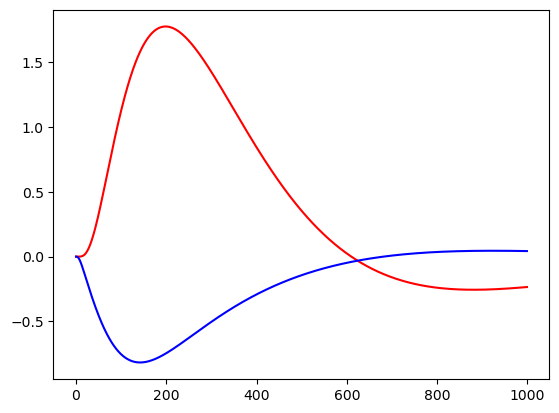

In [56]:
intercept_effective_conductance, traditional_effective_conductance, GE_est, GI_est = eff_cond_est_two(0.1, 6e-3, 15*1e-3, C=0.00024, GL = 1.93e-05, 
passive=False, plot=True, locE=37, locI=10, block='',name= '', locationE ='apic',locationI ='apic')
# intercept_effective_conductance, traditional_effective_conductance, GE_est, GI_est = eff_cond_est_two_normIh(0.1, 6e-3, 15*1e-3, C = 0.00031, GL = 1.33e-05, 
# passive=False, plot=True, locE = 37, locI = 10, block='',name= '', locationE ='apic',locationI ='apic')
# 0.0003825297524634034
# 1.3314834861882561e-05
# ['53', 'apic', '37', 'dend']
# intercept_effective_conductance, traditional_effective_conductance, GE_est, GI_est = eff_cond_est_two(0.1, 6e-3, 15*1e-3, C = 0.00024, GL = 1.93e-05, 
# passive=False, plot=True, locE = 53, locI = 37, block='',name= '', locationE ='apic',locationI ='dend')
# intercept_effective_conductance, traditional_effective_conductance, GE_est, GI_est = eff_cond_est_two_normIh(0.1, 6e-3, 15*1e-3, C = 0.00038, GL = 1.33e-05, 
# passive=False, plot=True, locE = 53, locI = 37, block='',name= '', locationE ='apic',locationI ='dend')


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


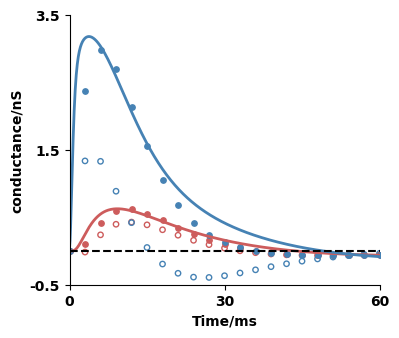

In [60]:
time = np.arange(0,len(GE_est))*0.1
s0 = 15
fig, ax2 = plt.subplots(1,1, figsize = (4,3.5))
plot_curve(ax2,time, GE_est*1e6, color='indianred', label='',
               xlim=[0,100], dx=50, linewidth=2, 
               ylim=[0, 2], dy=0., ynum_decimals=0, ylabel='conductance/nS')

plot_curve(ax2,time[::30], intercept_effective_conductance[0,::30]*1e3, color='indianred',label='',
               xlim=[0,100], dx=50,
               ylim=[0, 2], dy=0., ynum_decimals=0, ylabel='conductance/nS',
               nonscatter=False, s0=s0, facecolor='indianred')

plot_curve(ax2, time[::30], traditional_effective_conductance[0,::30]*1e3, color='indianred',label='',
               xlim=[0,1000], dx=500,
               ylim=[0, 2], dy  =0., ynum_decimals=1, ylabel='conductance/nS',
               nonscatter=False, s0=s0, facecolor='none')

plot_curve(ax2,time, GI_est*1e6,color='steelblue',label='',
               xlim=[0,100], dx=50,linewidth=2, 
               ylim=[0, 2], dy=0., ynum_decimals=0, ylabel='conductance/nS')

plot_curve(ax2, time[::30], 
           intercept_effective_conductance[1,::30]*1e3,color='steelblue',label='',
               xlim=[0,100], dx=50,
               ylim=[0, 2], dy=0., ynum_decimals=0, ylabel='conductance/nS',
               nonscatter=False, s0=s0, facecolor='steelblue')

plot_curve(ax2, time[::30], 
           traditional_effective_conductance[1,::30]*1e3,color='steelblue',label='',
               xlim=[0,60], dx=30,
               ylim=[-0.5, 3.5], dy = 2., ynum_decimals=1, ylabel='conductance/nS',
               nonscatter=False, s0=s0, facecolor='none')
ax2.axhline(y=0, color='black', linestyle='--')
plt.savefig("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/figure/figure4/pairEI_eff_con_relative_reversal_potential10.eps", format='eps', dpi=300)
plt.show()
# ax2[1].set_title('active I')

In [61]:
relative_error_E = np.linalg.norm(intercept_effective_conductance[0,:]*1e3 -  GE_est*1e6)/np.linalg.norm(GE_est*1e6)
relative_error_I = np.linalg.norm(intercept_effective_conductance[1,:]*1e3 -  GI_est*1e6)/np.linalg.norm(GI_est*1e6)
print(relative_error_E)
print(relative_error_I)
relative_error_E = np.linalg.norm(traditional_effective_conductance[0,:]*1e3 -  GE_est*1e6)/np.linalg.norm(GE_est*1e6)
relative_error_I = np.linalg.norm(traditional_effective_conductance[1,:]*1e3 -  GI_est*1e6)/np.linalg.norm(GI_est*1e6)
print(relative_error_E)
print(relative_error_I)

0.20021632525168567
0.23691925653608314
0.4472375687723418
0.7748598085435248


In [23]:
print(np.mean(intercept_effective_conductance[0,:]*1e3))

0.08585184245431465


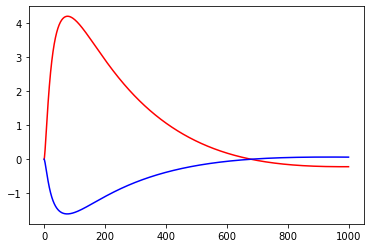

In [19]:
intercept_effective_conductance, traditional_effective_conductance, GE_est, GI_est = eff_cond_est_two(0.1, 4e-3, 5*1e-3, C=0.00024, GL = 1.93e-05, 
passive=False, plot=True, locE=0, locI=0, block='',name= '', locationE ='apic',locationI ='apic')

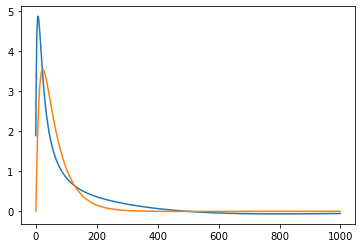

In [25]:
plt.plot(GE_est*1e6,label='GE_est')
plt.plot(intercept_effective_conductance[0,:]*1e3, label = 'GE_inter')

# location

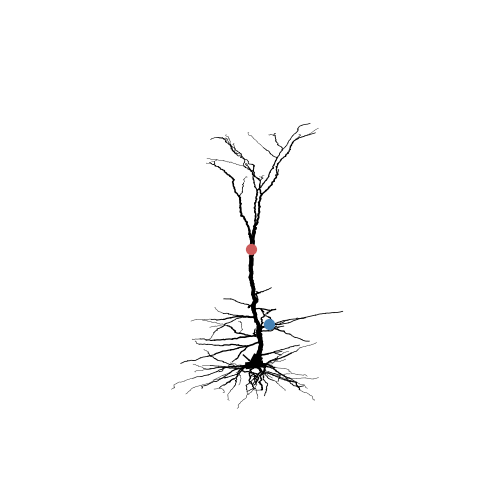

In [3]:
from neuron import h
from matplotlib import pyplot as plt

# 你的模型初始化和配置代码
L5PC = h.L5PCtemplate(morphologyFilename)
L5PC.soma[0].diam = 5.

# 绘图设置
ps = h.PlotShape(False)  # 创建PlotShape对象
ps.show(0)  # 不自动显示NEURON的窗口

# 使用Matplotlib进行绘图
ax = ps.plot(plt)
sec=L5PC.apic[37]
ax.scatter([(sec.x3d(0)+sec.x3d(1))/2], [(sec.y3d(0)+sec.y3d(1))/2],[(sec.z3d(0)+sec.z3d(1))/2], 
                   color='indianred', s=50, marker='o', label='')

secI=L5PC.apic[10]
ax.scatter([(secI.x3d(0)+secI.x3d(1))/2], [(secI.y3d(0)+secI.y3d(1))/2],[(secI.z3d(0)+secI.z3d(1))/2], 
                   color='steelblue', s=50, marker='o', label='')


# # 设置坐标轴范围
ax.set_xlim([-300, 300])  # 设置x轴范围
ax.set_ylim([0, 1400])  # 设置y轴范围
ax.set_zlim([-600, 0])  # 设置z轴范围

# ps.view(-400,0, 0, 300, 0, 300, 100, 500)
ax.view_init(elev=280, azim=98)
ax.grid(False)
# 关闭坐标轴
ax.axis('off')
plt.savefig("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/figure/figure4/pairEI_location.eps", format='eps', dpi=300)
plt.show()


# distance

In [11]:
def caculate_distance(locnumE, locationE, locnumI, locationI):
     
    L5PC = h.L5PCtemplate(morphologyFilename)
    x_soma = (L5PC.soma[0].x3d(0)+ L5PC.soma[0].x3d(1))/2.
    y_soma = (L5PC.soma[0].y3d(0)+ L5PC.soma[0].y3d(1))/2.
    z_soma = (L5PC.soma[0].z3d(0)+ L5PC.soma[0].z3d(1))/2.
    distance = np.zeros(2)
    if locationE=='dend':
        x_synE = (L5PC.dend[int(locnumE)].x3d(0)+ L5PC.dend[int(locnumE)].x3d(1))/2.
        y_synE = (L5PC.dend[int(locnumE)].y3d(0)+ L5PC.dend[int(locnumE)].y3d(1))/2.
        z_synE = (L5PC.dend[int(locnumE)].z3d(0)+ L5PC.dend[int(locnumE)].z3d(1))/2.
    if locationE=='apic':
        x_synE = (L5PC.apic[int(locnumE)].x3d(0)+ L5PC.apic[int(locnumE)].x3d(1))/2.
        y_synE = (L5PC.apic[int(locnumE)].y3d(0)+ L5PC.apic[int(locnumE)].y3d(1))/2.
        z_synE = (L5PC.apic[int(locnumE)].z3d(0)+ L5PC.apic[int(locnumE)].z3d(1))/2.
    
    if locationI=='dend':
        x_synI = (L5PC.dend[int(locnumI)].x3d(0)+ L5PC.dend[int(locnumI)].x3d(1))/2.
        y_synI = (L5PC.dend[int(locnumI)].y3d(0)+ L5PC.dend[int(locnumI)].y3d(1))/2.
        z_synI = (L5PC.dend[int(locnumI)].z3d(0)+ L5PC.dend[int(locnumI)].z3d(1))/2.
    if locationI=='apic':
        x_synI = (L5PC.apic[int(locnumI)].x3d(0)+ L5PC.apic[int(locnumI)].x3d(1))/2.
        y_synI = (L5PC.apic[int(locnumI)].y3d(0)+ L5PC.apic[int(locnumI)].y3d(1))/2.
        z_synI = (L5PC.apic[int(locnumI)].z3d(0)+ L5PC.apic[int(locnumI)].z3d(1))/2.
    distance[1] = np.sqrt((x_soma-x_synI)**2 + (y_soma-y_synI)**2 + (z_soma-z_synI)**2)
        
    distance[0] = np.sqrt((x_soma-x_synE)**2 + (y_soma-y_synE)**2 + (z_soma-z_synE)**2)
    
    return distance

In [12]:
distance = caculate_distance(37,'apic', 10, 'apic')   
print(distance)   

[578.25573029 193.64421155]


# Parallel

In [5]:
def error_eff_cond_est_two(run_dt, fE, fI, C=0.00024, GL = 1.93e-05, passive=True, locE=58, locI=37,
                         plot =False,  block='',name= '', locationE ='dend',locationI ='dend'):
    
    L5PC = h.L5PCtemplate(morphologyFilename)
    
    if passive:
        for sec in h.allsec():
            # 检查 section 是否有主动离子通道
            if h.ismembrane("na3", sec=sec):
                # 将电导设置为0
                sec.gbar_na3 = 0.
            if h.ismembrane("h", sec=sec):
                sec.ghdbar_h = 0.
            if h.ismembrane("kadist", sec=sec):
                sec.gkabar_kadist = 0.
            if h.ismembrane("kaprox", sec=sec):
                sec.gkabar_kaprox = 0.
            if h.ismembrane("kdrca1", sec=sec):
                sec.gkdrbar_kdrca1 = 0.
            if h.ismembrane("nax", sec=sec):
                sec.gbar_nax = 0.
            if h.ismembrane("Ca_HVA",sec=sec):
                sec.gCa_HVAbar_Ca_HVA = 0.
            if h.ismembrane("Ca_LVAst",sec=sec):
                sec.gCa_LVAstbar_Ca_LVAst = 0.
            if h.ismembrane("Ih",sec=sec):
                sec.gIhbar_Ih = 0.
            if h.ismembrane("Im",sec=sec):
                sec.gImbar_Im = 0.
            if h.ismembrane("K_Pst",sec=sec):
                sec.gK_Pstbar_K_Pst = 0.
            if h.ismembrane("K_Tst",sec=sec):
                sec.gK_Tstbar_K_Tst = 0.
            if h.ismembrane("Nap_Et2",sec=sec):
                sec.gNap_Et2bar_Nap_Et2 = 0.
            if h.ismembrane("NaTa_t",sec=sec):
                sec.gNaTa_tbar_NaTa_t = 0.
            if h.ismembrane("NaTs2_t",sec=sec):
                sec.gNaTs2_tbar_NaTs2_t = 0.
            if h.ismembrane("SK_E2",sec=sec):
                sec.gSK_E2bar_SK_E2 = 0.
            if h.ismembrane("SKv3_1",sec=sec):
                sec.gSKv3_1bar_SKv3_1 = 0.   
    
    if block:
        for sec in h.allsec():
            if h.ismembrane(block, sec=sec):
                # 将电导设置为0
                setattr(sec, name, 0.)
        
    h.dt = run_dt
    h.tstop = 600.
    if passive:
        h.v_init = -90.
        Vclamp_init = -90.
    else:
        h.v_init = -76.4
        Vclamp_init = -76.4
    recv = h.Vector().record(L5PC.soma[0](0.5)._ref_v)
    
    # Initialize an excitatory and inhibitory synaptic input
    # make a new stimulator
    stimE = h.NetStim()
    stimI = h.NetStim()

    if locationE == 'dend':
        synE = h.Exp2Syn(L5PC.dend[int(locE)](0.5))
    if locationE == 'apic':
        synE = h.Exp2Syn(L5PC.apic[int(locE)](0.5))
    if locationE == 'soma':
        synE = h.Exp2Syn(L5PC.soma[0](0.5))
    
    if locationI == 'dend':
        synI = h.Exp2Syn(L5PC.dend[int(locI)](0.5))
    if locationI == 'apic':
        synI = h.Exp2Syn(L5PC.apic[int(locI)](0.5))
    if locationI == 'soma':
        synI = h.Exp2Syn(L5PC.soma[0](0.5))
    synE.tau1 = 1.  # ms
    synE.tau2 = 5.  # ms
    synI.tau1 = 1.  # ms
    synI.tau2 = 5.  # ms

    synE.e = 13.6  # mV for E input and -100 for I input 
    synI.e = -86.4
        
    stimE.number = 1
    stimE.start = h.tstop - 100.  # ms
    stimI.number = 1
    stimI.start = h.tstop - 100.  # ms
    ncstimE = h.NetCon(stimE, synE)
    ncstimE.delay = 0.
    ncstimE.weight[0] = 0e-2  # uS
    ncstimI = h.NetCon(stimI, synI)
    ncstimI.delay = 0.
    ncstimI.weight[0] = 0e-2  # uS


    # Initialize voltage clamp
    vclamp = h.SEClamp(L5PC.soma[0](0.5))
    vclamp.amp1 = Vclamp_init
    vclamp.dur1 = h.tstop
    vclamp.dur2 = h.tstop
    vclamp.amp2 = Vclamp_init - 20.

    irec = h.Vector()
    irec.record(vclamp._ref_i)

    # Function to initialize the simulation
    def initialize():
        h.t = 0
        h.finitialize(h.v_init)
        h.fcurrent()

    # Function to integrate the simulation
    def integrate():
        while h.t < h.tstop:
            h.fadvance()

    # Function to run the simulation
    def go():
        initialize()
        integrate()

    # Main simulation loop
    def main():

        Vclamp = np.arange(-110.,-60.,10)
        tstart = int(stimI.start/run_dt+1)

        V_rest = -76.4
        epsilonE = 13.6 - V_rest
        epsilonI = -86.4 - V_rest
        epsilonI1 = -106.4 - V_rest
        
        #  pure E for the estimation of true GE_est
        vclamp.dur1 = 0.
        vclamp.dur2 = 0.
        vclamp.dur3 = 0.
        ncstimE.weight[0] = fE
        ncstimI.weight[0] = 0.
        go()
        recvE0 = np.array(recv.to_python())
        recvE0_norm = recvE0[tstart:tstart+1000] - V_rest
        dVdtE = np.diff(recvE0_norm)/run_dt
        dVdtE = np.append(dVdtE, 0)
        GE_est = (C*dVdtE + GL*recvE0_norm)/(epsilonE - recvE0_norm)
        
        #  pure I input for the estimation of GI_est
        vclamp.dur1 = 0.
        vclamp.dur2 = 0.
        vclamp.dur3 = 0.
        ncstimE.weight[0] = 0.
        ncstimI.weight[0] = fI
        go()
        recvI0 = np.array(recv.to_python())
        recvI0_norm = recvI0[tstart:tstart+1000] - V_rest
        dVdtI = np.diff(recvI0_norm)/run_dt
        dVdtI = np.append(dVdtI, 0)
        GI_est = (C*dVdtI + GL*recvI0_norm)/(epsilonI - recvI0_norm)
        if plot:
            plt.plot(recvE0_norm, 'r')
            plt.plot(recvI0_norm, 'b')
        
        
    
        Isyn_inj_t = np.zeros((len(Vclamp),1000))
        Isyn_epsilonI1_inj_t = np.zeros((len(Vclamp),1000))
        relative_error = np.zeros(4) 

        

        for i in range(len(Vclamp)):
            ncstimE.weight[0] = 0.
            ncstimI.weight[0] = 0.
            vclamp.amp1 = Vclamp[i]
            vclamp.dur1 = h.tstop
            h.v_init = V_rest
            go()
            Iinj0 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
            
            synE.e = 13.6
            synI.e = -86.4
            ncstimE.weight[0] = fE
            ncstimI.weight[0] = fI
            vclamp.amp1 = Vclamp[i]
            vclamp.dur1 = h.tstop
            h.v_init = V_rest
            go()
            Iinj1 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
            Isyn = (Iinj1[tstart:tstart+1000] - Iinj0[tstart:tstart+1000])
            Isyn_inj_t[i,:] = Isyn
            
            synE.e = 13.6
            synI.e = -106.4
            ncstimE.weight[0] = fE
            ncstimI.weight[0] = fI
            vclamp.amp1 = Vclamp[i]
            vclamp.dur1 = h.tstop
            h.v_init = V_rest
            go()
            Iinj1_epsilonI1 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
            Isyn_epsilonI1 =  (Iinj1_epsilonI1[tstart:tstart+1000] - Iinj0[tstart:tstart+1000])
            Isyn_epsilonI1_inj_t[i,:] = Isyn_epsilonI1
            
                                                         
        traditional_effective_conductance = np.zeros((2,1000))
        intercept_effective_conductance = np.zeros((2,1000))
        A = np.ones((len(Vclamp),2))
        A[:,0] = Vclamp - V_rest
        epsilonE = 13.6 - V_rest
        epsilonI = -86.4 - V_rest
        epsilonI1 = -106.4 - V_rest
        for i in range(1000):
            x, residuals, rank, singular_values = np.linalg.lstsq(A, Isyn_inj_t[:,i], 
                                                                  rcond=None)
            x_epsilonI1, residuals, rank, singular_values = np.linalg.lstsq(A, 
                                Isyn_epsilonI1_inj_t[:,i], rcond=None)
            
            traditional_effective_conductance[1, i] = (x[0]*epsilonE + x[1])/(epsilonE - epsilonI)
            traditional_effective_conductance[0, i] = (x[0]*epsilonI + x[1])/(epsilonI - epsilonE)
           
            intercept_effective_conductance[1,i] = (x[1] - x_epsilonI1[1])/(epsilonI1 - epsilonI)
            intercept_effective_conductance[0,i] = (-intercept_effective_conductance[1,i]*epsilonI - x[1])/epsilonE
        
        relative_error[0] = np.linalg.norm(GE_est*1e6-intercept_effective_conductance[0,:]*1e3)/np.linalg.norm(GE_est*1e6)
        relative_error[1] = np.linalg.norm(GE_est*1e6-traditional_effective_conductance[0,:]*1e3)/np.linalg.norm(GE_est*1e6)
        relative_error[2] = np.linalg.norm(GI_est*1e6-intercept_effective_conductance[1,:]*1e3)/np.linalg.norm(GI_est*1e6)
        relative_error[3] = np.linalg.norm(GI_est*1e6-traditional_effective_conductance[1,:]*1e3)/np.linalg.norm(GI_est*1e6)
        
        
        GE_est_norm = GE_est*1e6
        GI_est_norm = GI_est*1e6
        GE_est_inter = intercept_effective_conductance[0,:]*1e3  
        GE_est_trad = traditional_effective_conductance[0,:]*1e3
        GI_est_inter = intercept_effective_conductance[1,:]*1e3 
        GI_est_trad = traditional_effective_conductance[1,:]*1e3  
        return relative_error, GE_est_norm, GI_est_norm, GE_est_inter, GE_est_trad, GI_est_inter, GI_est_trad
    
    
    relative_error, GE_est_norm, GI_est_norm, GE_est_inter, GE_est_trad, GI_est_inter, GI_est_trad= main()
    N = len(relative_error) + len(GE_est_norm) + len(GI_est_norm) + len(GE_est_inter) + len(GE_est_trad) + len(GI_est_inter) + len(GI_est_trad)
    N1 = len(relative_error)
    N2 = N1 + len(GE_est_norm)
    N3 = N2 + len(GI_est_norm)
    N4 = N3 + len(GE_est_inter)
    N5 = N4 + len(GE_est_trad)
    N6 = N5 + len(GI_est_inter)
    N7 = N6 + len(GI_est_trad)
    results = np.zeros(N)
    results[:N1] = relative_error
    results[N1:N2] = GE_est_norm
    results[N2:N3] = GI_est_norm
    results[N3:N4] = GE_est_inter
    results[N4:N5] = GE_est_trad
    results[N5:N6] = GI_est_inter
    results[N6:N7] = GI_est_trad
    return results
    # return relative_error,GE_est_norm, GI_est_norm, GE_est_inter, GE_est_trad, GI_est_inter, GI_est_trad

In [ ]:
intercept_effective_conductance, traditional_effective_conductance, GE_est, GI_est = eff_cond_est_two(0.1, 6e-3, 15*1e-3, C=0.00024, GL = 1.93e-05, 
passive=False, plot=True, locE=37, locI=10, block='',name= '', locationE ='apic',locationI ='apic')

In [26]:
stimu0 = [37, 10, 'apic', 'apic']
results = error_eff_cond_est_two(0.1, 6e-3, 15e-3, C=0.00024, GL = 1.93e-05,
            passive=False, plot=False, locE=stimu0[0], locI=stimu0[1], block='',name= '', 
            locationE =stimu0[2],locationI =stimu0[3])
print(results[:4])

[ 2.30942011e-01  4.82029937e-01  2.66395212e-01 ... -1.82207987e-04
 -2.01613945e-04 -2.20993178e-04]


In [28]:
print(results[:4])

[0.23094201 0.48202994 0.26639521 0.73638277]


In [ ]:
# # Your existing functions and code
# def error_eff_cond_est_two_parallel(args,):
#     stimu0, = args
#     results = error_eff_cond_est_two(0.1, 4e-3, 5*1e-3, C=0.00024, GL = 1.93e-05,
#             passive=False, plot=False, locE=stimu0[0], locI=stimu0[2], block='',name= '', 
#             locationE =stimu0[1],locationI =stimu0[3])
     
#     return results

# Your existing functions and code
def error_eff_cond_est_two_parallel(args,):
    stimu0, = args
    results = error_eff_cond_est_two(0.1, 6e-3, 15e-3, C=0.00024, GL = 1.93e-05,
            passive=False, plot=False, locE=stimu0[0], locI=stimu0[2], block='',name= '', 
            locationE =stimu0[1],locationI =stimu0[3])
     
    return results

loc_apic = np.arange(0,109,1)
name_apic = np.repeat(['apic'],109)
loc_dend = np.arange(0,84,1)
name_dend = np.repeat(['dend'],84)
# 将数组组合成二维数组
apic_array = np.column_stack((loc_apic, name_apic))
dend_array = np.column_stack((loc_dend, name_dend))
# 沿着第一个轴（默认轴为0）连接两个数组
location_array = np.concatenate((apic_array, dend_array))
stimu =[]
for i in range(len(location_array)):
    for j in range(len(location_array)):
        stimu.append([location_array[i][0],location_array[i][1], location_array[j][0], location_array[j][1]])

# Create a Pool with desired number of processes (adjust as needed)
num_processes = 55
with Pool(num_processes) as pool:
    # Prepare arguments for parallel processing
    args_list = [(stimu0,) for stimu0 in stimu]

    # Apply the function in parallel
    results = pool.map(error_eff_cond_est_two_parallel, args_list)

# Process the results
# relative_error = np.zeros((len(stimu), 4))
# GE_est_norm = np.zeros((len(stimu), 1000))
# GI_est_norm = np.zeros((len(stimu), 1000))
# GE_est_inter = np.zeros((len(stimu), 1000))
# GE_est_trad = np.zeros((len(stimu), 1000)) 
# GI_est_inter = np.zeros((len(stimu), 1000))
# GI_est_trad = np.zeros((len(stimu), 1000))
results_total = np.zeros((len(stimu), 6004))

for i, result in enumerate(results):
    results_total[i, :] = result
np.savetxt("pair_eff_cond_E6e3_I15e3_whole_reversal_potential.txt", results_total)

In [ ]:
time = np.arange(0,len(GE_est))*0.1
s0 = 15
fig, ax2 = plt.subplots(1,1, figsize = (4,3.5))
plot_curve(ax2,time, GE_est*1e6, color='indianred', label='',
               xlim=[0,100], dx=50, linewidth=2, 
               ylim=[0, 2], dy=0., ynum_decimals=0, ylabel='conductance/nS')

plot_curve(ax2,time[::30], intercept_effective_conductance[0,::30]*1e3, color='indianred',label='',
               xlim=[0,100], dx=50,
               ylim=[0, 2], dy=0., ynum_decimals=0, ylabel='conductance/nS',
               nonscatter=False, s0=s0, facecolor='indianred')

plot_curve(ax2, time[::30], traditional_effective_conductance[0,::30]*1e3, color='indianred',label='',
               xlim=[0,1000], dx=500,
               ylim=[0, 2], dy  =0., ynum_decimals=1, ylabel='conductance/nS',
               nonscatter=False, s0=s0, facecolor='none')

plot_curve(ax2,time, GI_est*1e6,color='steelblue',label='',
               xlim=[0,100], dx=50,linewidth=2, 
               ylim=[0, 2], dy=0., ynum_decimals=0, ylabel='conductance/nS')

plot_curve(ax2, time[::30], 
           intercept_effective_conductance[1,::30]*1e3,color='steelblue',label='',
               xlim=[0,100], dx=50,
               ylim=[0, 2], dy=0., ynum_decimals=0, ylabel='conductance/nS',
               nonscatter=False, s0=s0, facecolor='steelblue')

plot_curve(ax2, time[::30], 
           traditional_effective_conductance[1,::30]*1e3,color='steelblue',label='',
               xlim=[0,60], dx=30,
               ylim=[-0.5, 3.5], dy = 2., ynum_decimals=1, ylabel='conductance/nS',
               nonscatter=False, s0=s0, facecolor='none')
ax2.axhline(y=0, color='black', linestyle='--')
# plt.savefig("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/figure/figure4/pairEI_eff_con_relative_reversal_potential.eps", format='eps', dpi=300)
plt.show()
# ax2[1].set_title('active I')

In [32]:
results_total = np.loadtxt("pair_eff_cond_E6e3_I15e3_whole_reversal_potential_I90.txt")
relative_error = results_total[:,:4]
GE_est_norm= results_total[:,4:1004]
GI_est_norm = results_total[:,1004:2004]
GE_est_inter = results_total[:,2004:3004]
GE_est_trad = results_total[:,3004:4004]
GI_est_inter= results_total[:,4004:5004]
GI_est_trad = results_total[:,5004:6004]
# GE_est_norm_total = results_total[:,4:1004]
# GI_est_norm_total = results_total[:,1004:2004]
# GE_est_inter_total = results_total[:,2004:3004]
# GE_est_trad_total = results_total[:,3004:4004]
# GI_est_inter_total = results_total[:,4004:5004]
# GI_est_trad_total = results_total[:,5004:6004]

In [ ]:
loc_apic = np.arange(0,109,1)
name_apic = np.repeat(['apic'],109)
loc_dend = np.arange(0,84,1)
name_dend = np.repeat(['dend'],84)
# 将数组组合成二维数组
apic_array = np.column_stack((loc_apic, name_apic))
dend_array = np.column_stack((loc_dend, name_dend))
# 沿着第一个轴（默认轴为0）连接两个数组
location_array = np.concatenate((apic_array, dend_array))
stimu =[]
for i in range(len(location_array)):
    for j in range(len(location_array)):
        stimu.append([location_array[i][0],location_array[i][1], location_array[j][0], location_array[j][1]])
stimu0 = ['37', 'apic', '10', 'apic']
index = stimu.index(stimu0)
print(index)
stimu[7151]

7151


['37', 'apic', '10', 'apic']

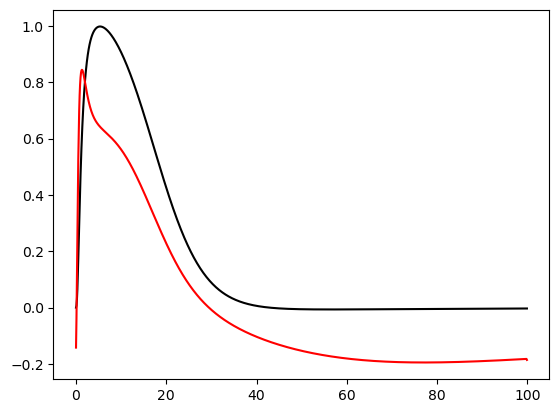

In [108]:
plt.plot(time, intercept_effective_conductance[1,]*1e3, label='GI_est',color = 'k')
plt.plot(time, GI_est_norm_total[10375,:], label='GE_est_norm_total',color = 'r')

In [5]:
# Linfity error
error_infty = np.zeros_like(relative_error)
error_infty[:,0] = np.max(np.abs(GE_est_norm - GE_est_inter),axis=1)/np.max(np.abs(GE_est_norm),axis=1)
error_infty[:,1] = np.max(np.abs(GE_est_norm - GE_est_trad),axis=1)/np.max(np.abs(GE_est_norm),axis=1)
error_infty[:,2] = np.max(np.abs(GI_est_norm - GI_est_inter),axis=1)/np.max(np.abs(GI_est_norm),axis=1)
error_infty[:,3] = np.max(np.abs(GI_est_norm - GI_est_trad),axis=1)/np.max(np.abs(GI_est_norm),axis=1)
print(np.mean(error_infty,axis=0))

[0.49850335 0.62623641 0.56860739 1.12330191]


In [63]:
# mean error
error_mean = np.zeros_like(relative_error)
error_mean[:,0] = np.abs(np.mean(GE_est_norm,axis=1) - np.mean(GE_est_inter, axis=1))/np.mean(GE_est_norm,axis=1)
error_mean[:,1] = np.abs(np.mean(GE_est_norm,axis=1) - np.mean(GE_est_trad, axis=1))/np.mean(GE_est_norm,axis=1)
error_mean[:,2] = np.abs(np.mean(GI_est_norm,axis=1) - np.mean(GI_est_inter, axis=1))/np.mean(GI_est_norm,axis=1)
error_mean[:,3] = np.abs(np.mean(GI_est_norm,axis=1) - np.mean(GI_est_trad, axis=1))/np.mean(GI_est_norm,axis=1)

print(np.mean(error_mean,axis=0))

[0.11716698 0.38520295 0.25003927 1.31985225]


In [ ]:
print(np.argmax(error_mean[:,2]))
stimu[10375]


10375


['53', 'apic', '37', 'dend']

In [15]:
print(min(error_mean[:,1]), max(error_mean[:,1]))

0.10610468044310142 2.594316075071228


In [34]:
relative_error_mean = np.mean(relative_error,axis=0)
GE_est_inter_mean = np.mean(GE_est_inter, axis=1)
GE_est_norm_mean = np.mean(GE_est_norm, axis=1)
GI_est_norm_mean = np.mean(GI_est_norm, axis=1)
GE_est_trad_mean = np.mean(GE_est_trad, axis=1)
GI_est_inter_mean = np.mean(GI_est_inter, axis=1)
GI_est_trad_mean = np.mean(GI_est_trad, axis=1)
negative_GE_est_inter = np.sum(GE_est_inter_mean<0)
negative_GE_est_trad = np.sum(GE_est_trad_mean<0)
negative_GI_est_inter = np.sum(GI_est_inter_mean<0)
negative_GI_est_trad = np.sum(GI_est_trad_mean<0)
negative_GE_est_norm = np.sum(GE_est_norm_mean<0)
negative_GI_est_norm = np.sum(GI_est_norm_mean<0)
print(negative_GE_est_norm)
print(negative_GI_est_norm)
print(np.where(GE_est_inter_mean<0)[0][0])

0
0
8506


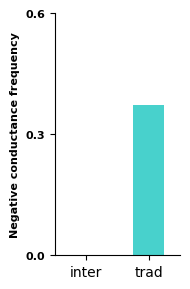

In [43]:
import matplotlib.pyplot as plt


y_values = np.array([negative_GI_est_inter, negative_GI_est_trad])/len(GI_est_inter_mean)
x_values = ['inter', 'trad']
# y_values = np.array([negative_GE_est_inter, negative_GE_est_trad])/len(GE_est_inter_mean)


# 指定每个条形的位置
positions = [1.5, 2.5]  # 注意x1和x2之间的距离小于x2和x3之间的距离

fig, ax = plt.subplots(1,1, figsize = (2,3))
ax.bar(positions, y_values, tick_label=x_values, color = ['lightcoral',  'mediumturquoise'],width=0.5)

# 添加标签和标题
# plt.xlabel('Variables')
ylim=[0,0.6]
dy=0.3
fontsize=8
ynum_decimals = 1
ax.set_ylabel('Negative conductance frequency', fontsize=fontsize, weight='bold')
ax.set_yticks(np.arange(ylim[0], ylim[1] + dy, dy))
ax.set_yticklabels(ax.get_yticks(), fontsize=fontsize, weight='bold')
ax.set_ylim([ylim[0], ylim[1]])
ax.set_xlim([1, 3])
def format_funcy(value, tick_number, num_decimals=ynum_decimals):
    if num_decimals==0:
        return f'{value:.0f}'
    return f'{value:.{num_decimals}f}'
ax.yaxis.set_major_formatter(FuncFormatter(format_funcy))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/figure/figure4/negative_distr_I_relative_reversal_potential10.eps", format='eps', dpi=300)


(37249, 4)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


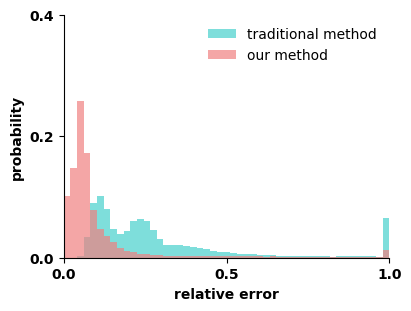

In [62]:
# distance = np.loadtxt('pairEI_distance.txt')
# relative_error = np.loadtxt('pair_eff_cond_relative_error_E6e3_I3e3_whole.txt')

error = error_mean
# print(np.shape(distance))
print(np.shape(error))
fontsize = 10
bins = np.linspace(0,1,50)
fig, ax1 = plt.subplots(1,1,figsize=(4,3), constrained_layout=True)

# 定义误差和 bin 范围
min_bin = bins[0]  # bins的最小值
max_bin = bins[-1]  # bins的最大值

# 将 error 限制在 [min_bin, max_bin] 之间
clipped_error_our = np.clip(error[:,0], min_bin, max_bin)
clipped_error_trad = np.clip(error[:,1], min_bin, max_bin)



nE_our,binsE_our = np.histogram(clipped_error_our,bins=bins)
nE_trad,binsE_trad = np.histogram(clipped_error_trad,bins=bins)
widths = bins[2]-bins[1]
ax1.bar(bins[:-1], nE_trad/np.sum(nE_trad), zorder=1, align='edge', width=widths, 
        color='mediumturquoise',alpha=0.7, edgecolor = None,  linewidth=1,label='traditional method')
ax1.bar(bins[:-1], nE_our/np.sum(nE_our), zorder=1, align='edge', width=widths,
        color='lightcoral',alpha=0.7, edgecolor = None,  linewidth=1,label='our method')


ax1.set_xlabel('relative error',fontsize=fontsize,weight='bold')
ax1.set_ylabel('probability',fontsize=fontsize,weight='bold')
ax1.set_xticks(np.arange(0,1.1,0.5))
ax1.set_yticks(np.arange(0,0.7,0.2))
ax1.set_xticklabels(np.arange(0,1.1,0.5),fontsize=fontsize,weight='bold')
ax1.set_yticklabels(np.arange(0,0.7,0.2),fontsize=fontsize,weight='bold')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylim([0,0.4])
ax1.set_xlim([0,1])
ax1.legend(loc='best',fontsize=fontsize,edgecolor='white')
# ax1.set_title('E',fontsize=fontsize,weight='bold')
plt.savefig('relative_error_eff_con_E_reversal_potential10.eps')

(37249, 4)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


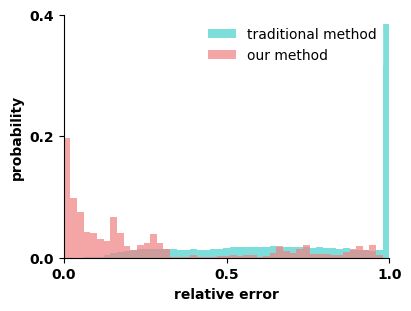

In [53]:
# distance = np.loadtxt('pairEI_distance.txt')
# relative_error = np.loadtxt('pair_eff_cond_relative_error_E6e3_I3e3_whole.txt')

error = error_mean
# print(np.shape(distance))
print(np.shape(error))
fontsize = 10
bins = np.linspace(0,1,50)
fig, ax1 = plt.subplots(1,1,figsize=(4,3), constrained_layout=True)

# 定义误差和 bin 范围
min_bin = bins[0]  # bins的最小值
max_bin = bins[-1]  # bins的最大值

# 将 error 限制在 [min_bin, max_bin] 之间
clipped_error_our = np.clip(error[:,2], min_bin, max_bin)
clipped_error_trad = np.clip(error[:,3], min_bin, max_bin)



nE_our,binsE_our = np.histogram(clipped_error_our,bins=bins)
nE_trad,binsE_trad = np.histogram(clipped_error_trad,bins=bins)
widths = bins[2]-bins[1]
ax1.bar(bins[:-1], nE_trad/np.sum(nE_trad), zorder=1, align='edge', width=widths, 
        color='mediumturquoise',alpha=0.7, edgecolor = None,  linewidth=1,label='traditional method')
ax1.bar(bins[:-1], nE_our/np.sum(nE_our), zorder=1, align='edge', width=widths,
        color='lightcoral',alpha=0.7, edgecolor = None,  linewidth=1,label='our method')


ax1.set_xlabel('relative error',fontsize=fontsize,weight='bold')
ax1.set_ylabel('probability',fontsize=fontsize,weight='bold')
ax1.set_xticks(np.arange(0,1.1,0.5))
ax1.set_yticks(np.arange(0,0.7,0.2))
ax1.set_xticklabels(np.arange(0,1.1,0.5),fontsize=fontsize,weight='bold')
ax1.set_yticklabels(np.arange(0,0.7,0.2),fontsize=fontsize,weight='bold')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylim([0,0.4])
ax1.set_xlim([0,1])
ax1.legend(loc='best',fontsize=fontsize,edgecolor='white')
# ax1.set_title('E',fontsize=fontsize,weight='bold')
plt.savefig('relative_error_eff_con_I_reversal_potential10.eps')

In [ ]:
loc_apic = np.arange(0,109,1)
name_apic = np.repeat(['apic'],109)
loc_dend = np.arange(0,84,1)
name_dend = np.repeat(['dend'],84)
# 将数组组合成二维数组
apic_array = np.column_stack((loc_apic, name_apic))
dend_array = np.column_stack((loc_dend, name_dend))
# 沿着第一个轴（默认轴为0）连接两个数组A
location_array = np.concatenate((apic_array, dend_array))

In [7]:
np.sum(nE_trad)

37249

In [14]:
np.max(nE_trad/np.sum(nE_our))

0.34449246959649926

# caculate distance 

In [6]:
distance = caculate_distance(10,'apic', 10, 'dend')   
print(distance)   

[193.64421155  55.82296469]


In [131]:
def caculate_distance_parallel(args,):
    loc0, = args
    distance = caculate_distance(loc0[0], loc0[1], loc0[2], loc0[3])      
    return distance

loc_apic = np.arange(0,109,1)
name_apic = np.repeat(['apic'],109)
loc_dend = np.arange(0,84,1)
name_dend = np.repeat(['dend'],84)
# 将数组组合成二维数组
apic_array = np.column_stack((loc_apic, name_apic))
dend_array = np.column_stack((loc_dend, name_dend))
# 沿着第一个轴（默认轴为0）连接两个数组
location_array = np.concatenate((apic_array, dend_array))
stimu =[]
for i in range(len(location_array)):
    for j in range(len(location_array)):
        stimu.append([location_array[i][0],location_array[i][1], location_array[j][0], location_array[j][1]])

distance = np.zeros((np.shape(stimu)[0],2))
# Create a Pool with desired number of processes (adjust as needed)
num_processes = 55
with Pool(num_processes) as pool:
    # Prepare arguments for parallel processing
    args_list = [(stimu0,) for stimu0 in stimu]

    # Apply the function in parallel
    results = pool.map(caculate_distance_parallel, args_list)

# Process the results
for i, result in enumerate(results):
    distance[i, :] = result
np.savetxt('pairEI_distance.txt', distance)

In [2]:
distance = np.loadtxt('pairEI_distance.txt')
print(np.max(distance))

1114.7382635674667


In [19]:

from matplotlib.ticker import FuncFormatter
from matplotlib.colors import Normalize
def format_func(value, tick_number):
    return f'{value:.0f}'  # 将刻度值格式化为小数点后两位

def plot_z_color(ax2,x,y,z,title='',xlim=[0,100],dx=20,cmap0 = 'coolwarm',
               ylim=[0,10],dy=5.0, fontsize=10, alpha = 1.0, xlabel='Time/ms', 
               ylabel = 'Frequency/Hz', label='',ynum_decimals =1, facecolors='none',
            s0=10, facecolor='none',norm = Normalize(vmin=0, vmax=1)):


    sc=ax2.scatter(x,y,c=z, alpha=alpha, label=label, s=s0,cmap=cmap0,norm=norm)
        
    ax2.set_xlabel(xlabel,fontsize=fontsize, weight='bold')
    ax2.set_ylabel(ylabel,fontsize=fontsize, weight='bold')
    

    def format_funcy(value, tick_number, num_decimals=ynum_decimals):
        if num_decimals==0:
          return f'{value:.0f}'
        return f'{value:.{num_decimals}f}'

    if dy:
        ax2.set_yticks(np.arange(ylim[0], ylim[1] + dy, dy))
        ax2.set_yticklabels(ax2.get_yticks(), fontsize=fontsize, weight='bold')
        ax2.set_ylim([ylim[0], ylim[1]])
        ax2.yaxis.set_major_formatter(FuncFormatter(format_funcy))
        
  
    if dx:
       ax2.set_xticks(np.arange(xlim[0],xlim[1]+dx,dx))
       ax2.set_xticklabels(np.arange(xlim[0],xlim[1]+dx,dx),fontsize=fontsize,weight='bold')
       ax2.set_xlim(xlim)
       
    if title:
       ax2.set_title('{0}'.format(title),fontsize=fontsize,weight='bold')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    if label:
       ax2.legend(loc='best',prop=font2,edgecolor='white')
    return sc

/tmp/ipykernel_3137416/3833228932.py:25: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  colorbar = fig.colorbar(sc)


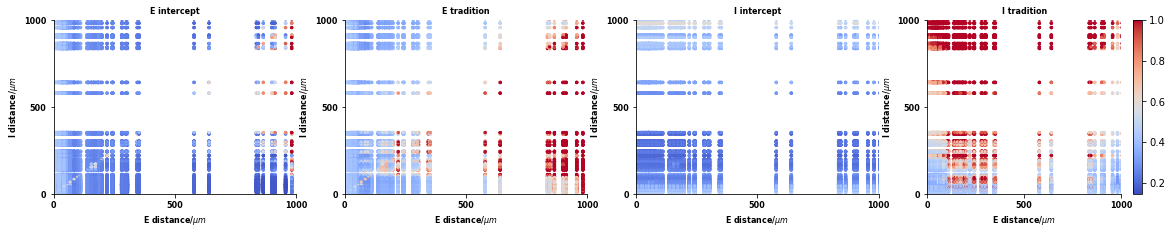

In [20]:
x = distance[:,0]
y = distance[:,1]
norm = Normalize(vmin=np.min(relative_error), vmax=1.)
s0 = 5
fontsize = 8

fig, ax2 = plt.subplots(1,4, figsize = (20,3.2))

sc=plot_z_color(ax2[0],x,y,relative_error[:,0], xlim=[0,1000], s0 = s0, fontsize=fontsize, dx=500,cmap0='coolwarm',
               ylim=[0,1000],dy=500,  alpha = 1.0, xlabel='E distance/'+r'$\mu m$', 
               ylabel = 'I distance/'+r'$\mu m$', label='',ynum_decimals =0, facecolors='none',
          facecolor='none',norm=norm, title='E intercept')
sc1=plot_z_color(ax2[1],x,y,relative_error[:,1], xlim=[0,1000],dx=500,s0 = s0, fontsize=fontsize, cmap0='coolwarm',
               ylim=[0,1000],dy=500,  alpha = 1.0, xlabel='E distance/'+r'$\mu m$', 
               ylabel = 'I distance/'+r'$\mu m$', label='',ynum_decimals =0, facecolors='none',
            facecolor='none',norm=norm, title='E tradition')
sc2=plot_z_color(ax2[2],x,y,relative_error[:,2], xlim=[0,1000],dx=500,s0 = s0, fontsize=fontsize, cmap0='coolwarm',
               ylim=[0,1000],dy=500,  alpha = 1.0, xlabel='E distance/'+r'$\mu m$', 
               ylabel = 'I distance/'+r'$\mu m$', label='',ynum_decimals =0, facecolors='none',
            facecolor='none',norm=norm, title='I intercept')
sc3=plot_z_color(ax2[3],x,y,relative_error[:,3], xlim=[0,1000],dx=500,s0 = s0, fontsize=fontsize, cmap0='coolwarm',
               ylim=[0,1000],dy=500, alpha = 1.0, xlabel='E distance/'+r'$\mu m$', 
               ylabel = 'I distance/'+r'$\mu m$', label='',ynum_decimals =0, facecolors='none',
             facecolor='none',norm=norm,  title='I tradition')
colorbar = fig.colorbar(sc)
# colorbar = fig.colorbar(sc1)
# colorbar = fig.colorbar(sc2)
# colorbar = fig.colorbar(sc3)


In [80]:
loc_apic = np.arange(0,109,1)
name_apic = np.repeat(['apic'],109)
loc_dend = np.arange(0,84,1)
name_dend = np.repeat(['dend'],84)
# 将数组组合成二维数组
apic_array = np.column_stack((loc_apic, name_apic))
dend_array = np.column_stack((loc_dend, name_dend))
stimu0 =[]
for i in range(len(apic_array)):
    for j in range(len(dend_array)):
        stimu0.append([apic_array[i][0],apic_array[i][1], dend_array[j][0], dend_array[j][1]])
print(stimu0)


[['0', 'apic', '0', 'dend'], ['0', 'apic', '1', 'dend'], ['0', 'apic', '2', 'dend'], ['0', 'apic', '3', 'dend'], ['0', 'apic', '4', 'dend'], ['0', 'apic', '5', 'dend'], ['0', 'apic', '6', 'dend'], ['0', 'apic', '7', 'dend'], ['0', 'apic', '8', 'dend'], ['0', 'apic', '9', 'dend'], ['0', 'apic', '10', 'dend'], ['0', 'apic', '11', 'dend'], ['0', 'apic', '12', 'dend'], ['0', 'apic', '13', 'dend'], ['0', 'apic', '14', 'dend'], ['0', 'apic', '15', 'dend'], ['0', 'apic', '16', 'dend'], ['0', 'apic', '17', 'dend'], ['0', 'apic', '18', 'dend'], ['0', 'apic', '19', 'dend'], ['0', 'apic', '20', 'dend'], ['0', 'apic', '21', 'dend'], ['0', 'apic', '22', 'dend'], ['0', 'apic', '23', 'dend'], ['0', 'apic', '24', 'dend'], ['0', 'apic', '25', 'dend'], ['0', 'apic', '26', 'dend'], ['0', 'apic', '27', 'dend'], ['0', 'apic', '28', 'dend'], ['0', 'apic', '29', 'dend'], ['0', 'apic', '30', 'dend'], ['0', 'apic', '31', 'dend'], ['0', 'apic', '32', 'dend'], ['0', 'apic', '33', 'dend'], ['0', 'apic', '34', 'de

In [47]:
relative_error = error_eff_cond_est_two(0.1, 6e-3, 3*1e-3, C=0.00024, GL = 1.93e-05, 
passive=False, plot=False, locE=51, locI=38, block='',name= '', locationE ='apic',locationI ='apic')

In [ ]:
Vclamp = np.arange(-100.,-20.,10)
traditional_effective_conductance1 = np.zeros((2,1000))
intercept_effective_conductance1 = np.zeros((2,1000))
A = np.ones((len(Vclamp),2))
A[:,0] = Vclamp - V_rest
epsilonE = 0. - V_rest
epsilonI1 = -120. - V_rest
epsilonI = -100. - V_rest
for i in range(1000):
    x, residuals, rank, singular_values = np.linalg.lstsq(A, Isyn_epsilonI_inj_t[:,i], 
                                                            rcond=None)
    x_epsilonI1, residuals, rank, singular_values = np.linalg.lstsq(A, 
                        Isyn_epsilonI1_inj_t[:,i], rcond=None)
    
    traditional_effective_conductance1[0, i] = (x[0]*epsilonE + x[1])/(epsilonE - epsilonI)
    traditional_effective_conductance1[1, i] = (x[0]*epsilonI + x[1])/(epsilonI - epsilonE)
    
    intercept_effective_conductance1[1,i] = (x[1] - x_epsilonI1[1])/(epsilonI1 - epsilonI)
    intercept_effective_conductance1[0,i] = (-intercept_effective_conductance[1,i]*epsilonI - x[1])/epsilonE

# Ground truth

## $G_L$, C estimation

In [25]:
def est_GL_C(run_dt, passive=True, block='', name= ''):
   
    L5PC = h.L5PCtemplate(morphologyFilename)
    
    # L5PC.soma[0].L = 0.001
    
    if passive:
        for sec in h.allsec():
            # 检查 section 是否有主动离子通道
            if h.ismembrane("na3", sec=sec):
                # 将电导设置为0
                sec.gbar_na3 = 0.
            if h.ismembrane("h", sec=sec):
                sec.ghdbar_h = 0.
            if h.ismembrane("kadist", sec=sec):
                sec.gkabar_kadist = 0.
            if h.ismembrane("kaprox", sec=sec):
                sec.gkabar_kaprox = 0.
            if h.ismembrane("kdrca1", sec=sec):
                sec.gkdrbar_kdrca1 = 0.
            if h.ismembrane("nax", sec=sec):
                sec.gbar_nax = 0.
            if h.ismembrane("Ca_HVA",sec=sec):
                sec.gCa_HVAbar_Ca_HVA = 0.
            if h.ismembrane("Ca_LVAst",sec=sec):
                sec.gCa_LVAstbar_Ca_LVAst = 0.
            if h.ismembrane("Ih",sec=sec):
                sec.gIhbar_Ih = 0.
            if h.ismembrane("Im",sec=sec):
                sec.gImbar_Im = 0.
            if h.ismembrane("K_Pst",sec=sec):
                sec.gK_Pstbar_K_Pst = 0.
            if h.ismembrane("K_Tst",sec=sec):
                sec.gK_Tstbar_K_Tst = 0.
            if h.ismembrane("Nap_Et2",sec=sec):
                sec.gNap_Et2bar_Nap_Et2 = 0.
            if h.ismembrane("NaTa_t",sec=sec):
                sec.gNaTa_tbar_NaTa_t = 0.
            if h.ismembrane("NaTs2_t",sec=sec):
                sec.gNaTs2_tbar_NaTs2_t = 0.
            if h.ismembrane("SK_E2",sec=sec):
                sec.gSK_E2bar_SK_E2 = 0.
            if h.ismembrane("SKv3_1",sec=sec):
                sec.gSKv3_1bar_SKv3_1 = 0.   
    
    if block:
        for sec in h.allsec():
            if h.ismembrane(block, sec=sec):
                # 将电导设置为0
                setattr(sec, name, 0.)
    
    # for sec in h.allsec():
    #     if h.ismembrane("Ih",sec=sec):
    #         sec.gIhbar_Ih = 0.0002/20.
               
    h.dt = run_dt
    h.tstop = 700.
    if passive:
        h.v_init = -90.
    else:
        h.v_init = -88.8
        
    time = h.Vector().record(h._ref_t)
    recv = h.Vector().record(L5PC.soma[0](0.5)._ref_v)
    

    # Initialize voltage clamp
    iclamp = h.IClamp(L5PC.soma[0](0.5))
    iclamp.delay = 100.
    iclamp.dur = 300.
    iclamp.amp = 0.
    
    i_clamp = h.Vector().record(iclamp._ref_i)

    # Function to initialize the simulation
    def initialize():
        h.t = 0
        h.finitialize(h.v_init)
        h.fcurrent()

    # Function to integrate the simulation
    def integrate():
        while h.t < h.tstop:
            h.fadvance()

    # Function to run the simulation
    def go():
        initialize()
        integrate()
        
    def verfication(GL, C, t, I):
        
        v = np.zeros(len(t))
        for i in range(len(t)-1):
            v[i+1] = v[i] + run_dt/C*(-GL*v[i]+I[i])
            
        return v
        
        
    # Main simulation loop
    def main():
    
        i_amp = np.arange(1,20)*0.004
        C = np.zeros(len(i_amp))
        GL = np.zeros(len(i_amp))
        iclamp.amp = 0.
        go()
        recv0 = np.array(recv.to_python())
        V_rest = recv0[-1]
        print(V_rest)
        
        for i in range(len(i_amp)):      
            iclamp.amp = i_amp[i]
            go()
            recv0 = np.array(recv.to_python())
            i0 = np.array(i_clamp.to_python())
            time0 = np.array(time.to_python())
            plt.plot(time0, recv0-V_rest, color='r')
            recv_norm = recv0 - V_rest
            GL[i] = i_amp[i]*1e-3/recv_norm[4000]
            
            y = np.log(recv_norm[4000:4300])
            A = np.ones((len(time0[4000:4300]),2))
            A[:,0] = time0[4000:4300]
            x, residuals, rank, singular_values = np.linalg.lstsq(A, y, rcond=None)
            tau_decay = -1./x[0] 
            C[i] = tau_decay*GL[i]
            v = verfication(GL[i], C[i], time0, i0*1e-3)
            # v_tune = verfication(0.011, 0.31, time0, i0)
            plt.plot(time0, v, 'b')
            plt.xlim([350,500])
            plt.ylim([0,5.0])
            # plt.plot(time0, v_tune, 'k')
            # plt.legend()
        return  GL,C
    
    GL,C = main()
    return  GL,C

-76.33835683797541


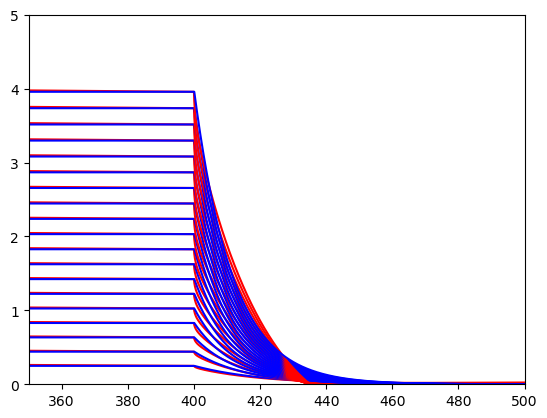

In [26]:
GL,C = est_GL_C(0.1, passive=False, block='',name= '')

In [40]:
print(np.mean(C))
print(np.mean(GL))

0.0003825297524634034
1.3314834861882561e-05


# active: C = 0.00024, GL = 1.93e-5

# true effective conductance

In [ ]:
def true_eff_cond_two(run_dt, fE, fI, passive=True, locE=58, locI=37,
                         GL = 0.012, C = 0.49, block='',name= '', location ='dend'):
    
    L5PC = h.L5PCtemplate(morphologyFilename)
    if passive:
        for sec in h.allsec():
            # 检查 section 是否有主动离子通道
            if h.ismembrane("na3", sec=sec):
                # 将电导设置为0
                sec.gbar_na3 = 0.
            if h.ismembrane("h", sec=sec):
                sec.ghdbar_h = 0.
            if h.ismembrane("kadist", sec=sec):
                sec.gkabar_kadist = 0.
            if h.ismembrane("kaprox", sec=sec):
                sec.gkabar_kaprox = 0.
            if h.ismembrane("kdrca1", sec=sec):
                sec.gkdrbar_kdrca1 = 0.
            if h.ismembrane("nax", sec=sec):
                sec.gbar_nax = 0.
            if h.ismembrane("Ca_HVA",sec=sec):
                sec.gCa_HVAbar_Ca_HVA = 0.
            if h.ismembrane("Ca_LVAst",sec=sec):
                sec.gCa_LVAstbar_Ca_LVAst = 0.
            if h.ismembrane("Ih",sec=sec):
                sec.gIhbar_Ih = 0.
            if h.ismembrane("Im",sec=sec):
                sec.gImbar_Im = 0.
            if h.ismembrane("K_Pst",sec=sec):
                sec.gK_Pstbar_K_Pst = 0.
            if h.ismembrane("K_Tst",sec=sec):
                sec.gK_Tstbar_K_Tst = 0.
            if h.ismembrane("Nap_Et2",sec=sec):
                sec.gNap_Et2bar_Nap_Et2 = 0.
            if h.ismembrane("NaTa_t",sec=sec):
                sec.gNaTa_tbar_NaTa_t = 0.
            if h.ismembrane("NaTs2_t",sec=sec):
                sec.gNaTs2_tbar_NaTs2_t = 0.
            if h.ismembrane("SK_E2",sec=sec):
                sec.gSK_E2bar_SK_E2 = 0.
            if h.ismembrane("SKv3_1",sec=sec):
                sec.gSKv3_1bar_SKv3_1 = 0.   
    
    if block:
        for sec in h.allsec():
            if h.ismembrane(block, sec=sec):
                # 将电导设置为0
                setattr(sec, name, 0.)
        
    h.dt = run_dt
    h.tstop = 600.
    if passive:
        h.v_init = -90.
    else:
        h.v_init = -76.4
    recv = h.Vector().record(L5PC.soma[0](0.5)._ref_v)
    t = h.Vector().record(h._ref_t)
    
    
    # Initialize an excitatory and inhibitory synaptic input
    # make a new stimulator
    stimE = h.NetStim()
    stimI = h.NetStim()

    if location == 'dend':
        synE = h.Exp2Syn(L5PC.dend[int(locE)](0.9))
        synI = h.Exp2Syn(L5PC.dend[int(locI)](0.9))
    if location == 'apic':
        synE = h.Exp2Syn(L5PC.apic[int(locE)](0.9))
        synI = h.Exp2Syn(L5PC.apic[int(locI)](0.9))
    if location == 'soma':
        synE = h.Exp2Syn(L5PC.soma[0](0.5))
        synI = h.Exp2Syn(L5PC.soma[0](0.5))
    synE.tau1 = 5.  # ms
    synE.tau2 = 8.  # ms
    synI.tau1 = 6.  # ms
    synI.tau2 = 18.  # ms
    I_syn_local = h.Vector().record(synE._ref_i)

    synE.e = 0.  # mV for E input and -100 for I input 
    synI.e = -100.
        
    stimE.number = 1
    stimE.start = h.tstop -100.  # ms
    stimI.number = 1
    stimI.start = h.tstop -100.  # ms
    ncstimE = h.NetCon(stimE, synE)
    ncstimE.delay = 0.
    ncstimE.weight[0] = 0e-2  # uS
    ncstimI = h.NetCon(stimI, synI)
    ncstimI.delay = 0.
    ncstimI.weight[0] = 0e-2  # uS


    # Function to initialize the simulation
    def initialize():
        h.t = 0
        h.finitialize(h.v_init)
        h.fcurrent()

    # Function to integrate the simulation
    def integrate():
        while h.t < h.tstop:
            h.fadvance()

    # Function to run the simulation
    def go():
        initialize()
        integrate()

    # Main simulation loop
    def main():

        ncstimE.weight[0] = 0.
        ncstimI.weight[0] = 0.
        go()
        recv0 = np.array(recv.to_python())
        V_rest = recv0[-1]
        epsilonE = synE.e - V_rest
        epsilonI = synI.e - V_rest
        print(V_rest)
        print(epsilonE)
        print(epsilonI)
        
        fig, ax2 = plt.subplots(1,4, figsize = (12,3))
            
        ncstimE.weight[0] = fE
        ncstimI.weight[0] = 0.
        h.v_init = V_rest
        go()
        I_syn_localE = np.array(I_syn_local.to_python())
        time = np.array(t.to_python())
        recvE = np.array(recv.to_python())
        recvE_norm = recvE - V_rest
        ax2[0].plot(recvE, label='VE')
        diffVE = np.diff(recvE_norm)/run_dt
        diffVE = np.append(diffVE, 0.)
        ax2[2].plot(time, diffVE, label = 'diffVE')
        I_synE = C*diffVE + GL*recvE_norm
        GE_eff = I_synE / (epsilonE - recvE_norm)
        ax2[1].plot(time,GE_eff, label ='GE')
        ax2[3].plot(time, I_syn_localE)
        ax2[3].set_xlim([stimE.start,stimE.start+100])
        ax2[1].set_xlim([stimE.start,stimE.start+100])
        
        
        ncstimE.weight[0] = 0.
        ncstimI.weight[0] = fI
        h.v_init = V_rest
        go()
        recvI = np.array(recv.to_python())
        recvI_norm = recvI - V_rest
        ax2[0].plot(time, recvI, label ='VI')
        diffVI = np.diff(recvI_norm)/run_dt
        diffVI = np.append(diffVI,0.)
        ax2[2].plot(time, diffVI, label = 'diffVI')
        I_synI = C*diffVI + GL*recvI_norm
        GI_eff = I_synI / (epsilonI - recvI_norm)
        ax2[1].plot(time, GI_eff, label = 'GI')
        ax2[0].legend()
        ax2[1].legend()
        # ax2[1].set_xlim([0,10])
        ax2[2].legend()
        
        
        
        return GE_eff, GI_eff, I_synE, I_synI, I_syn_localE, recvE_norm
    
    GE_eff, GI_eff, I_synE, I_synI, I_syn_localE, recvE_norm = main()
    
    return GE_eff, GI_eff, I_synE, I_synI, I_syn_localE, recvE_norm

-76.32028277321199
76.32028277321199
-23.679717226788014


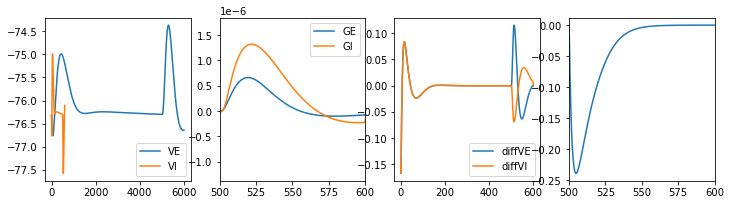

In [141]:
GE_eff, GI_eff, I_synE, I_synI, I_syn_localE, recvE_norm = true_eff_cond_two(0.1, 5*1e-3, 10*1e-3, passive=False,
                locE=37, locI=51, GL=np.mean(GL), C=np.mean(C), block='',name= '', location ='apic')
# gIhbar_Ih

# data analysis

NameError: name 'GE_eff' is not defined

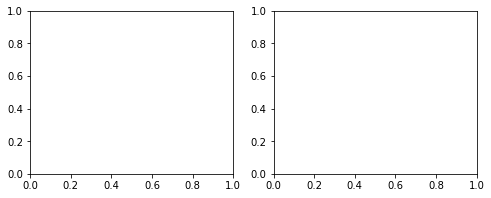

In [6]:
fig, ax2 = plt.subplots(1,2, figsize = (8,3))
plot_curve(ax2[0],np.arange(0,len(GE_eff[5001:]))*0.1, GE_eff[5001:]*1e6,color='darkred',label='True '+r'$G^{eff}_E$',
               xlim=[0,100], dx=50,
               ylim=[0, 2], dy=0., ynum_decimals=0, ylabel='conductance/nS')

plot_curve(ax2[0], np.arange(0,len(intercept_effective_conductance[0,:]))*0.1, 
           intercept_effective_conductance[0,:]*1e3, color='steelblue',label='intercept '+r'$G^{eff}_E$',
               xlim=[0,100], dx=50,
               ylim=[0, 2], dy=0., ynum_decimals=0, ylabel='conductance/nS',
               nonscatter=False, s0=5)

plot_curve(ax2[0], np.arange(0,len(traditional_effective_conductance[0,:]))*0.1, 
           traditional_effective_conductance[0,:]*1e3, color='black',label='trad '+r'$G^{eff}_E$',
               xlim=[0,100], dx=50,
               ylim=[0, 2], dy  =0., ynum_decimals=1, ylabel='conductance/nS',
               nonscatter=False, s0=5)
ax2[0].set_title('active E')

plot_curve(ax2[1],np.arange(0,len(GE_eff[5001:]))*0.1, GI_eff[5001:]*1e6,color='darkred',label='True '+r'$G^{eff}_I$',
               xlim=[0,100], dx=50,
               ylim=[0, 2], dy=0., ynum_decimals=0, ylabel='conductance/nS')

plot_curve(ax2[1], np.arange(0,len(intercept_effective_conductance[0,:]))*0.1, 
           intercept_effective_conductance[1,:]*1e3,color='steelblue',label='intercept '+r'$G^{eff}_I$',
               xlim=[0,100], dx=50,
               ylim=[0, 2], dy=0., ynum_decimals=0, ylabel='conductance/nS',
               nonscatter=False, s0=5)

plot_curve(ax2[1], np.arange(0,len(traditional_effective_conductance[0,:]))*0.1, 
           traditional_effective_conductance[1,:]*1e3,color='black',label='trad '+r'$G^{eff}_I$',
               xlim=[0,100], dx=50,
               ylim=[-0.1, 7], dy  =0., ynum_decimals=1, ylabel='conductance/nS',
               nonscatter=False, s0=5)
ax2[1].set_title('active I')

# multiple E

# single neuron

In [ ]:
def true_eff_cond_one(run_dt, fE, passive=True, locE=58, 
                         GL = 0.012, C = 0.49, block='',name= '', location ='dend'):
    
    L5PC = h.L5PCtemplate(morphologyFilename)
    # L5PC.soma[0].L=0.001
    
    if passive:
        for sec in h.allsec():
            # 检查 section 是否有主动离子通道
            if h.ismembrane("na3", sec=sec):
                # 将电导设置为0
                sec.gbar_na3 = 0.
            if h.ismembrane("h", sec=sec):
                sec.ghdbar_h = 0.
            if h.ismembrane("kadist", sec=sec):
                sec.gkabar_kadist = 0.
            if h.ismembrane("kaprox", sec=sec):
                sec.gkabar_kaprox = 0.
            if h.ismembrane("kdrca1", sec=sec):
                sec.gkdrbar_kdrca1 = 0.
            if h.ismembrane("nax", sec=sec):
                sec.gbar_nax = 0.
            if h.ismembrane("Ca_HVA",sec=sec):
                sec.gCa_HVAbar_Ca_HVA = 0.
            if h.ismembrane("Ca_LVAst",sec=sec):
                sec.gCa_LVAstbar_Ca_LVAst = 0.
            if h.ismembrane("Ih",sec=sec):
                sec.gIhbar_Ih = 0.
            if h.ismembrane("Im",sec=sec):
                sec.gImbar_Im = 0.
            if h.ismembrane("K_Pst",sec=sec):
                sec.gK_Pstbar_K_Pst = 0.
            if h.ismembrane("K_Tst",sec=sec):
                sec.gK_Tstbar_K_Tst = 0.
            if h.ismembrane("Nap_Et2",sec=sec):
                sec.gNap_Et2bar_Nap_Et2 = 0.
            if h.ismembrane("NaTa_t",sec=sec):
                sec.gNaTa_tbar_NaTa_t = 0.
            if h.ismembrane("NaTs2_t",sec=sec):
                sec.gNaTs2_tbar_NaTs2_t = 0.
            if h.ismembrane("SK_E2",sec=sec):
                sec.gSK_E2bar_SK_E2 = 0.
            if h.ismembrane("SKv3_1",sec=sec):
                sec.gSKv3_1bar_SKv3_1 = 0.   
    
    if block:
        for sec in h.allsec():
            if h.ismembrane(block, sec=sec):
                # 将电导设置为0
                setattr(sec, name, 0.)
        
    h.dt = run_dt
    h.tstop = 500.
    if passive:
        h.v_init = -90.
    else:
        h.v_init = -76.4
    recv = h.Vector().record(L5PC.soma[0](0.)._ref_v)
    t = h.Vector().record(h._ref_t)
    
    
    # Initialize an excitatory and inhibitory synaptic input
    # make a new stimulator
    stimE = h.NetStim()
   
    if location == 'dend':
        synE = h.Exp2Syn(L5PC.dend[int(locE)](0.9))
    if location == 'apic':
        synE = h.Exp2Syn(L5PC.apic[int(locE)](0.9))
    if location == 'soma':
        synE = h.Exp2Syn(L5PC.soma[0](0.))
    synE.tau1 = 5.  # ms
    synE.tau2 = 8.  # ms
    I_syn_local = h.Vector().record(synE._ref_i)

    synE.e = 0.  # mV for E input and -100 for I input 
        
    stimE.number = 1
    stimE.start = h.tstop -100.  # ms
    ncstimE = h.NetCon(stimE, synE)
    ncstimE.delay = 0.
    ncstimE.weight[0] = 0e-2  # uS
  

    # Function to initialize the simulation
    def initialize():
        h.t = 0
        h.finitialize(h.v_init)
        h.fcurrent()

    # Function to integrate the simulation
    def integrate():
        while h.t < h.tstop:
            h.fadvance()

    # Function to run the simulation
    def go():
        initialize()
        integrate()

    # Main simulation loop
    def main():

        ncstimE.weight[0] = 0.
        go()
        recv0 = np.array(recv.to_python())
        V_rest = recv0[-1]
        epsilonE = synE.e - V_rest
        print(V_rest)
        print(epsilonE)
        
        fig, ax2 = plt.subplots(1,4, figsize = (12,3))
            
        ncstimE.weight[0] = fE
        h.v_init = V_rest
        go()
        I_syn_localE = np.array(I_syn_local.to_python())
        time = np.array(t.to_python())
        recvE = np.array(recv.to_python())
        recvE_norm = recvE - V_rest
        ax2[0].plot(time, recvE, label='VE')
        diffVE = np.diff(recvE_norm)/run_dt
        diffVE = np.append(diffVE, 0.)
        ax2[2].plot(time, diffVE, label = 'diffVE')
        I_synE = C*diffVE + GL*recvE_norm
        GE_eff = I_synE / (epsilonE - recvE_norm)
        ax2[1].plot(time, GE_eff, label ='GE')
        ax2[3].plot(time, I_syn_localE)
        ax2[3].set_xlim([400,410])
        ax2[1].set_xlim([400,410])
        
        
        ax2[0].legend()
        ax2[1].legend()
        # ax2[1].set_xlim([0,10])
        ax2[2].legend()
        
        
        
        return GE_eff, I_synE, I_syn_localE, recvE_norm
    
    GE_eff, I_synE, I_syn_localE, recvE_norm = main()
    
    return GE_eff, I_synE, I_syn_localE, recvE_norm

In [ ]:
def eff_cond_est_one(run_dt, fE, passive=True, locE=58,
                     block='',name= '', location ='dend'):
    
    L5PC = h.L5PCtemplate(morphologyFilename)
    # L5PC.soma[0].L=0.001
    if passive:
        for sec in h.allsec():
            # 检查 section 是否有主动离子通道
            if h.ismembrane("na3", sec=sec):
                # 将电导设置为0
                sec.gbar_na3 = 0.
            if h.ismembrane("h", sec=sec):
                sec.ghdbar_h = 0.
            if h.ismembrane("kadist", sec=sec):
                sec.gkabar_kadist = 0.
            if h.ismembrane("kaprox", sec=sec):
                sec.gkabar_kaprox = 0.
            if h.ismembrane("kdrca1", sec=sec):
                sec.gkdrbar_kdrca1 = 0.
            if h.ismembrane("nax", sec=sec):
                sec.gbar_nax = 0.
            if h.ismembrane("Ca_HVA",sec=sec):
                sec.gCa_HVAbar_Ca_HVA = 0.
            if h.ismembrane("Ca_LVAst",sec=sec):
                sec.gCa_LVAstbar_Ca_LVAst = 0.
            if h.ismembrane("Ih",sec=sec):
                sec.gIhbar_Ih = 0.
            if h.ismembrane("Im",sec=sec):
                sec.gImbar_Im = 0.
            if h.ismembrane("K_Pst",sec=sec):
                sec.gK_Pstbar_K_Pst = 0.
            if h.ismembrane("K_Tst",sec=sec):
                sec.gK_Tstbar_K_Tst = 0.
            if h.ismembrane("Nap_Et2",sec=sec):
                sec.gNap_Et2bar_Nap_Et2 = 0.
            if h.ismembrane("NaTa_t",sec=sec):
                sec.gNaTa_tbar_NaTa_t = 0.
            if h.ismembrane("NaTs2_t",sec=sec):
                sec.gNaTs2_tbar_NaTs2_t = 0.
            if h.ismembrane("SK_E2",sec=sec):
                sec.gSK_E2bar_SK_E2 = 0.
            if h.ismembrane("SKv3_1",sec=sec):
                sec.gSKv3_1bar_SKv3_1 = 0.   
    
    if block:
        for sec in h.allsec():
            if h.ismembrane(block, sec=sec):
                # 将电导设置为0
                setattr(sec, name, 0.)
        
    h.dt = run_dt
    h.tstop = 200.
    if passive:
        h.v_init = -90.
        Vclamp_init = -90.
    else:
        h.v_init = -76.4
        Vclamp_init = -76.4
    t = h.Vector().record(h._ref_t)
    recv = h.Vector().record(L5PC.soma[0](0.5)._ref_v)
    
    # Initialize an excitatory and inhibitory synaptic input
    # make a new stimulator
    stimE = h.NetStim()

    if location == 'dend':
        synE = h.Exp2Syn(L5PC.dend[int(locE)](0.9))
    if location == 'apic':
        synE = h.Exp2Syn(L5PC.apic[int(locE)](0.9))
    if location == 'soma':
        synE = h.Exp2Syn(L5PC.soma[0](0.5))
    synE.tau1 = 5.  # ms
    synE.tau2 = 8.  # ms

    synE.e = 0.  # mV for E input and -100 for I input 
    Isyn_local = h.Vector().record(synE._ref_i)
     
    stimE.number = 1
    stimE.start = 100.  # ms
    ncstimE = h.NetCon(stimE, synE)
    ncstimE.delay = 0.
    ncstimE.weight[0] = 0e-2  # uS


    # Initialize voltage clamp
    vclamp = h.SEClamp(L5PC.soma[0](0.5))
    vclamp.amp1 = Vclamp_init
    vclamp.dur1 = h.tstop
    vclamp.dur2 = h.tstop
    vclamp.amp2 = Vclamp_init - 20.

    irec = h.Vector()
    irec.record(vclamp._ref_i)

    # Function to initialize the simulation
    def initialize():
        h.t = 0
        h.finitialize(h.v_init)
        h.fcurrent()

    # Function to integrate the simulation
    def integrate():
        while h.t < h.tstop:
            h.fadvance()

    # Function to run the simulation
    def go():
        initialize()
        integrate()

    # Main simulation loop
    def main():

        Vclamp = np.arange(-110.,-60.,10)
        vclamp.dur1 = 0.
        vclamp.dur2 = 0.
        vclamp.dur3 = 0.
        ncstimE.weight[0] = 0.
        stimE.start = h.tstop
        go()
        time = np.array(t.to_python())
        recv0 = np.array(recv.to_python())
        I_syn_local = np.array(Isyn_local.to_python())
        V_rest = recv0[-1]

        fig, ax2 = plt.subplots(1,3, figsize = (12,3))
        ax2[0].set_title('I_syn_local')
        ax2[0].plot(time,I_syn_local,label='no input, no clamp')
        ax2[1].set_title('somatic V')
        ax2[1].plot(time, recv0, label='no input, no clamp')
        print(V_rest)
        Isyn_inj_t = np.zeros((len(Vclamp),1000))
        Isyn_epsilonE1_inj_t = np.zeros((len(Vclamp),1000))

        for i in range(len(Vclamp)):
            ncstimE.weight[0] = 0.
            vclamp.amp1 = Vclamp[i]
            vclamp.amp2 = Vclamp[i]
            vclamp.dur1 = h.tstop
            vclamp.dur2 = h.tstop
            go()
            Iinj0 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
            recv0 = np.array(recv.to_python())
            ax2[1].plot(time, recv0, label='no input'+str(Vclamp[i]))
        
            
            synE.e = 0.
            ncstimE.weight[0] = fE
            stimE.start = 100.
            vclamp.amp1 = Vclamp[i]
            vclamp.amp2 = Vclamp[i]
            vclamp.dur1 = h.tstop
            vclamp.dur2 = h.tstop
            go()
            Iinj1 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
            Isyn =  -(Iinj1[1001:] - Iinj0[1001:])
            Isyn_inj_t[i,:] = Isyn
            time = np.array(t.to_python())
            I_syn_local = np.array(Isyn_local.to_python())
            ax2[0].plot(time,I_syn_local, label='epsilonE'+str(Vclamp[i]))
            recv0 = np.array(recv.to_python())
            ax2[1].plot(time, recv0, label='E input'+str(Vclamp[i]))
            ax2[1].legend()
            
            
            synE.e = 10.
            stimE.start = 100.
            ncstimE.weight[0] = fE
            vclamp.amp1 = Vclamp[i]
            vclamp.dur1 = h.tstop
            go()
            Iinj1_epsilonE1 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
            Isyn_epsilonE1 =  -(Iinj1_epsilonE1[1001:] - Iinj0[1001:])
            Isyn_epsilonE1_inj_t[i,:] = Isyn_epsilonE1
            time = np.array(t.to_python())
            I_syn_local = np.array(Isyn_local.to_python())
            # ax2[0].plot(time,I_syn_local, label='epsilonE1'+str(Vclamp[i]))
            
                                                         
        traditional_effective_conductance = np.zeros(1000)
        traditional_effective_conductance_epsilonE = np.zeros(1000)
        intercept_effective_conductance = np.zeros(1000)
        intercept_effective_conductance_epsilonE = np.zeros(1000)
        A = np.ones((len(Vclamp),2))
        A[:,0] = Vclamp - V_rest
        epsilonE = 0. - V_rest
        epsilonE1 = 10. - V_rest
        A1 = Vclamp - V_rest - epsilonE
        for i in range(1000):
            x, residuals, rank, singular_values = np.linalg.lstsq(A, Isyn_inj_t[:,i], 
                                                                  rcond=None)
            x_epsilonE1, residuals, rank, singular_values = np.linalg.lstsq(A, 
                                Isyn_epsilonE1_inj_t[:,i], rcond=None)
            
            # traditional_effective_conductance[i] = np.sum(A1 * Isyn_inj_t[:,i]) / np.sum(A1**2)
            # traditional_effective_conductance_epsilonE[i] = np.sum(A1 * Isyn_epsilonE1_inj_t[:,i]) / np.sum(A1**2)
            traditional_effective_conductance[i] = - x[0]
            traditional_effective_conductance_epsilonE[i] = - x_epsilonE1[0]
   
            intercept_effective_conductance[i] = x[1]/epsilonE
            intercept_effective_conductance_epsilonE[i] = x_epsilonE1[1]/epsilonE1
    
    
        return intercept_effective_conductance,intercept_effective_conductance_epsilonE, traditional_effective_conductance,traditional_effective_conductance_epsilonE, Isyn_inj_t
    
    
    intercept_effective_conductance,intercept_effective_conductance_epsilonE, traditional_effective_conductance,traditional_effective_conductance_epsilonE, Isyn_inj_t = main()
    return intercept_effective_conductance,intercept_effective_conductance_epsilonE, traditional_effective_conductance,traditional_effective_conductance_epsilonE, Isyn_inj_t

-76.25092437885147


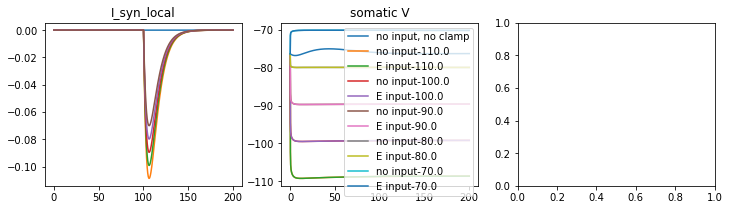

In [110]:
int_eff_cond,int_eff_cond_epsilonE, trad_eff_cond,trad_eff_cond_epsilonE,  Isyn_inj_t = eff_cond_est_one(0.1,1e-3,
                passive=False, locE=51, block='',name= '', location ='soma')
# gIhbar_Ih

0.00023621669506603387
1.923540200728279e-05
-76.30063860379752
76.30063860379752


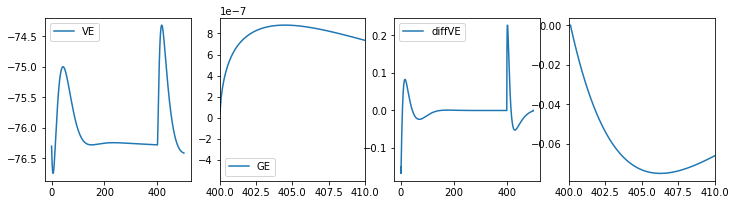

In [112]:
C0 = np.mean(C)
GL0 =  np.mean(GL)
print(C0)
print(GL0)
GE_eff, I_synE, I_syn_localE, recvE_norm = true_eff_cond_one(0.1, 1*1e-3, passive=False,
                locE=51,  GL=GL0, C=C0, block='',name= '', location ='soma')

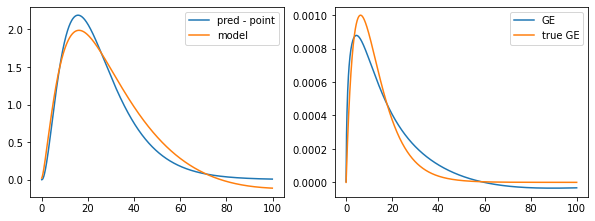

In [ ]:
fig, ax2 = plt.subplots(1,2, figsize = (10,3.5))
V_rest = -76.4
C0 = np.mean(C)
GL0 = np.mean(GL)
time= np.arange(0,1000)*0.1
V = np.zeros(len(time))
epsilonE = 0 - V_rest
fE = 1e-3
uE = np.exp(-time/8.)-np.exp(-time/5.)
NE = ((5./8.)**(5./3.)-(5./8.)**(8./3.))**(-1)
for i in range(len(V)-1):
    V[i+1] = V[i] + 0.1/C0*(-GL0*V[i] - fE*NE*uE[i]*1e-3*(V[i]-epsilonE) )
ax2[0].plot(time,V,label='pred - point')
ax2[0].plot(time,recvE_norm[4001:], label='model')
ax2[0].legend()

true_GE = fE*NE*uE

ax2[1].plot(time, GE_eff[4000:-1]*1e3,label='GE')
ax2[1].plot(time,true_GE,label='true GE')
ax2[1].legend()

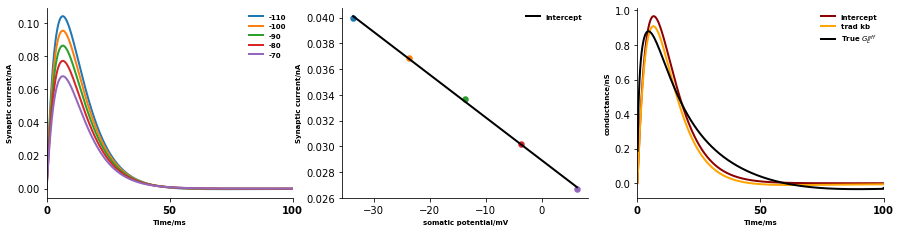

In [114]:
Vclamp = np.arange(-110.,-60.,10)
V_norm = Vclamp - V_rest

time=np.arange(0,np.shape(Isyn_inj_t)[1],1)*0.1
# color = ['#E74C3C', '#EC7063', '#F1948A', '#F5B7B1', '#FADBD8']
color =['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']


A = np.ones((len(Vclamp),2))
A[:,0] = V_norm
# x, residuals, rank, singular_values = np.linalg.lstsq(A, I_syn_peak_E, rcond=None)


fig, ax2 = plt.subplots(1,3, figsize = (15,3.5))
for i in range(np.shape(Isyn_inj_t)[0]):
    plot_curve(ax2[0],time,Isyn_inj_t[i,:],color=color[i],label=int(Vclamp[i]),xlim=[0,100], dx=50,
               ylim=[0.,0.002], dy=0.0,ynum_decimals=3, ylabel='Synaptic current/nA')
    
    plot_curve(ax2[1],V_norm[i],Isyn_inj_t[i,200],color=color[i], xlim=[], dx=25,
                ylim=[0.,0.002], dy=0.0,ynum_decimals=3, xlabel='somatic potential/mV',
                ylabel='Synaptic current/nA', nonscatter=False, s0=20)
    
x_t200, residuals, rank, singular_values = np.linalg.lstsq(A, Isyn_inj_t[:,200], 
                                                                  rcond=None)
                                                      
plot_curve(ax2[1], V_norm, (x_t200[0]*V_norm + x_t200[1]), color='black', xlim=[], dx=0.,
                ylim=[0.,0.002], dy=0.0, ynum_decimals=3, xlabel='somatic potential/mV',
                ylabel='Synaptic current/nA', label='intercept')

epsilonE = 0. - V_rest
# A1 = V_norm - epsilonE
# trad_eff_cond_t200 = np.sum(A1.T * Isyn_inj_t[:,200]) / np.sum(A1**2)
# plot_curve(ax2[1],V_norm, trad_eff_cond_t200*(V_norm - epsilonE), color='darkred', xlim=[], dx=0.,
#                 ylim=[0.,0.002], dy=0.0,ynum_decimals=3, xlabel='somatic potential/mV',
#                 ylabel='Synaptic current/nA',label='trad', nonscatter=False, s0=20)

# traditional_effective_conductance = np.zeros(1000)
traditional_effective_conductance_kb = np.zeros(1000)
intercept_effective_conductance = np.zeros(1000)
# intercept_effective_conductance_epsilonE = np.zeros(1000)
for i in range(1000):
    x, residuals, rank, singular_values = np.linalg.lstsq(A, Isyn_inj_t[:,i], 
                                                            rcond=None)
    # traditional_effective_conductance[i] = np.sum(A1 * Isyn_inj_t[:,i]) / np.sum(A1**2)
    traditional_effective_conductance_kb[i] = -x[0]
    # traditional_effective_conductance[i] = np.sum(A1 * Isyn_inj_t[:,i]) / np.sum(A1**2)
    
   
    intercept_effective_conductance[i] = x[1]/epsilonE
    
plot_curve(ax2[2],time, intercept_effective_conductance*1e3,color='darkred',
           label='intercept',xlim=[0,100], dx=50,
               ylim=[0.,0.05], dy=0.0,ynum_decimals=3, ylabel='Synaptic conductance/nS')
# plot_curve(ax2[2],time,traditional_effective_conductance*1e3,color='steelblue',
#            label='trad k',xlim=[0,100], dx=50,
#                ylim=[0.,0.05], dy=0.02,ynum_decimals=3, ylabel='Synaptic conductance/nS')

plot_curve(ax2[2],time, traditional_effective_conductance_kb*1e3,color='orange',
           label='trad kb',xlim=[0,100], dx=50,
               ylim=[0.,0.05], dy=0.0,ynum_decimals=3, ylabel='Synaptic conductance/nS')

plot_curve(ax2[2],np.arange(1,len(GE_eff[4001:])+1)*0.1, GE_eff[4001:]*1e6,color='black',label='True '+r'$G^{eff}_E$',
               xlim=[0,100], dx=50,
               ylim=[0, 0.05], dy=0.0, ynum_decimals=0, ylabel='conductance/nS')

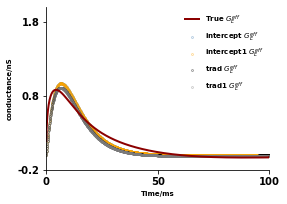

In [113]:
fig, ax2 = plt.subplots(1,1, figsize = (4,3))
plot_curve(ax2,np.arange(0,len(int_eff_cond))*0.1, GE_eff[4001:]*1e6,color='darkred',label='True '+r'$G^{eff}_E$',
               xlim=[0,100], dx=50,
               ylim=[0, 0.2], dy=0.1, ynum_decimals=0, ylabel='conductance/nS')

plot_curve(ax2, np.arange(0,len(int_eff_cond))*0.1, 
           int_eff_cond*1e3,color='steelblue',label='intercept '+r'$G^{eff}_E$',
               xlim=[0,100], dx=50,
               ylim=[0, 2], dy=1, ynum_decimals=0, ylabel='conductance/nS',
               nonscatter=False, s0=0.1)

plot_curve(ax2, np.arange(0,len(int_eff_cond))*0.1, 
           int_eff_cond_epsilonE*1e3,color='orange',label='intercept1 '+r'$G^{eff}_E$',
               xlim=[0,100], dx=50,
               ylim=[0, 2], dy=1, ynum_decimals=0, ylabel='conductance/nS',
               nonscatter=False, s0=0.1)

plot_curve(ax2, np.arange(0,len(int_eff_cond))*0.1, 
          trad_eff_cond*1e3,color='black',label='trad '+r'$G^{eff}_E$',
               xlim=[0,100], dx=50,
               ylim=[0, 0.2], dy  =1, ynum_decimals=0, ylabel='conductance/nS',
               nonscatter=False, s0=0.1)

plot_curve(ax2, np.arange(0,len(int_eff_cond))*0.1, 
          trad_eff_cond_epsilonE*1e3,color='gray',label='trad1 '+r'$G^{eff}_E$',
               xlim=[0,100], dx=50,
               ylim=[-0.2, 0.4], dy  =0.2, ynum_decimals=1, ylabel='conductance/nS',
               nonscatter=False, s0=0.1)

# plot_curve(ax2, t,g/np.max(g)*np.max(GE_eff*1e6),color='green',label='trad1 '+r'$G^{eff}_E$',
#                xlim=[0,20], dx=10,
#                ylim=[0, 0.2], dy  =0.1, ynum_decimals=1, ylabel='conductance/nS',
#                nonscatter=False, s0=1)


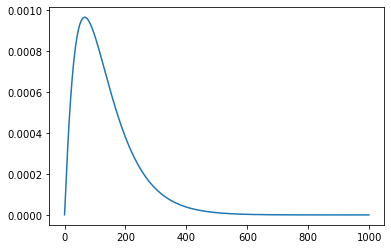

In [98]:
plt.plot(int_eff_cond)

In [4]:
def verfication(GL, C, t, I,dt):
    
    v = np.zeros(len(t))
    for i in range(len(t)-1):
        v[i+1] = v[i] + dt/C*(-GL*v[i]+I[i])
        
    return v
    

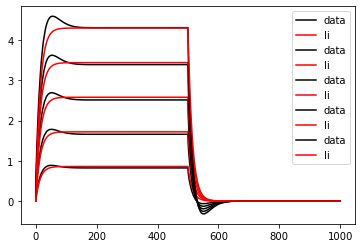

In [103]:
data=np.loadtxt('pas_parameter_neuron.dat')
V_rest=-70
data_norm = data[:,1:] - V_rest
I=0.01*np.arange(1,6)
tstop=1000
dt =0.1
time0 = np.arange(0,tstop+dt,dt)
GL = I/data_norm[:,int(tstop/dt/2.)]
C = np.zeros(len(I))
tstart = int(tstop/dt/2.+1)
gl=0.07
S=1.66e-4
GL1 = gl*S*1e3
C1 =S*1e3 
for i in range(len(I)):
    y = np.log(data_norm[i,tstart:(tstart+200)])
    A = np.ones((len(y),2))
    A[:,0] = np.arange(0,len(y))*dt
    x, residuals, rank, singular_values = np.linalg.lstsq(A, y, rcond=None)
    tau_decay = -1./x[0] 
    C[i] = tau_decay*GL[i]
    i0 = np.ones(len(time0))*I[i]
    i0[int(tstop/dt/2.):] = 0.
    v = verfication(GL[i], C[i], time0, i0,dt)
    v_li = verfication(GL1, C1, time0, i0,dt)
    # plt.plot(time0, v, 'b', label='me')
    plt.plot(time0, data_norm[i,:], 'k', label='data') 
    plt.plot(time0, v_li, 'r', label='li') 
    
    # plt.xlim([499.5,600]) 
    plt.legend()

In [ ]:
L5PC = h.L5PCtemplate(morphologyFilename)

h.dt = 0.1
h.tstop = 200.
h.v_init = -76.4
Vclamp_init = -76.4
t = h.Vector().record(h._ref_t)
recv = h.Vector().record(L5PC.soma[0](0.5)._ref_v)

# Initialize an excitatory and inhibitory synaptic input
def initialize():
    h.t = 0
    h.finitialize(h.v_init)
    h.fcurrent()

# Function to integrate the simulation
def integrate():
    while h.t < h.tstop:
        h.fadvance()

# Function to run the simulation
def go():
    initialize()
    integrate()


go()
time = np.array(t.to_python())
recv = np.array(recv.to_python())

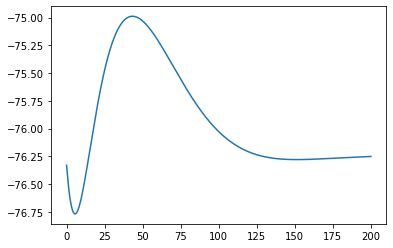

In [51]:
plt.plot(time,recv)